In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
file_path = 'Mendelian.train.tsv'
df=pd.read_csv(file_path, sep='\t')

In [3]:
metrics = df.columns.tolist()

In [4]:
POSITIVES_NUMBER = 356

In [8]:
def plot_metric(name, my_list, _min, _max):
    """Plot given list values."""
    plt.title(name)
    plt.ylim(_min, _max)
    arr = np.array(my_list)
    trimmed = arr[arr!=0]
    x = range(0, len(trimmed))
    y = np.sort(trimmed)
    plt.xlabel("n")
    plt.ylabel(name)
    plt.plot(x, y, '.')

In [9]:
def plot_normalized_metric(name, my_list):
    """Plot given list values."""
    plt.title("Normalized %s" % (name))
    arr = np.array(my_list)
    trimmed = arr[arr!=0]
    min_val, max_val = np.min(trimmed), np.max(trimmed)
    mean = np.mean(trimmed)
    normal_arr = (trimmed - mean) / (max_val - min_val)
    x = np.linspace(0,1, len(normal_arr))
    y = np.sort(normal_arr)
    plt.xlabel("n")
    plt.ylabel(name)
    plt.plot(x, y, '.')

HBox(children=(IntProgress(value=0, max=26), HTML(value='')))

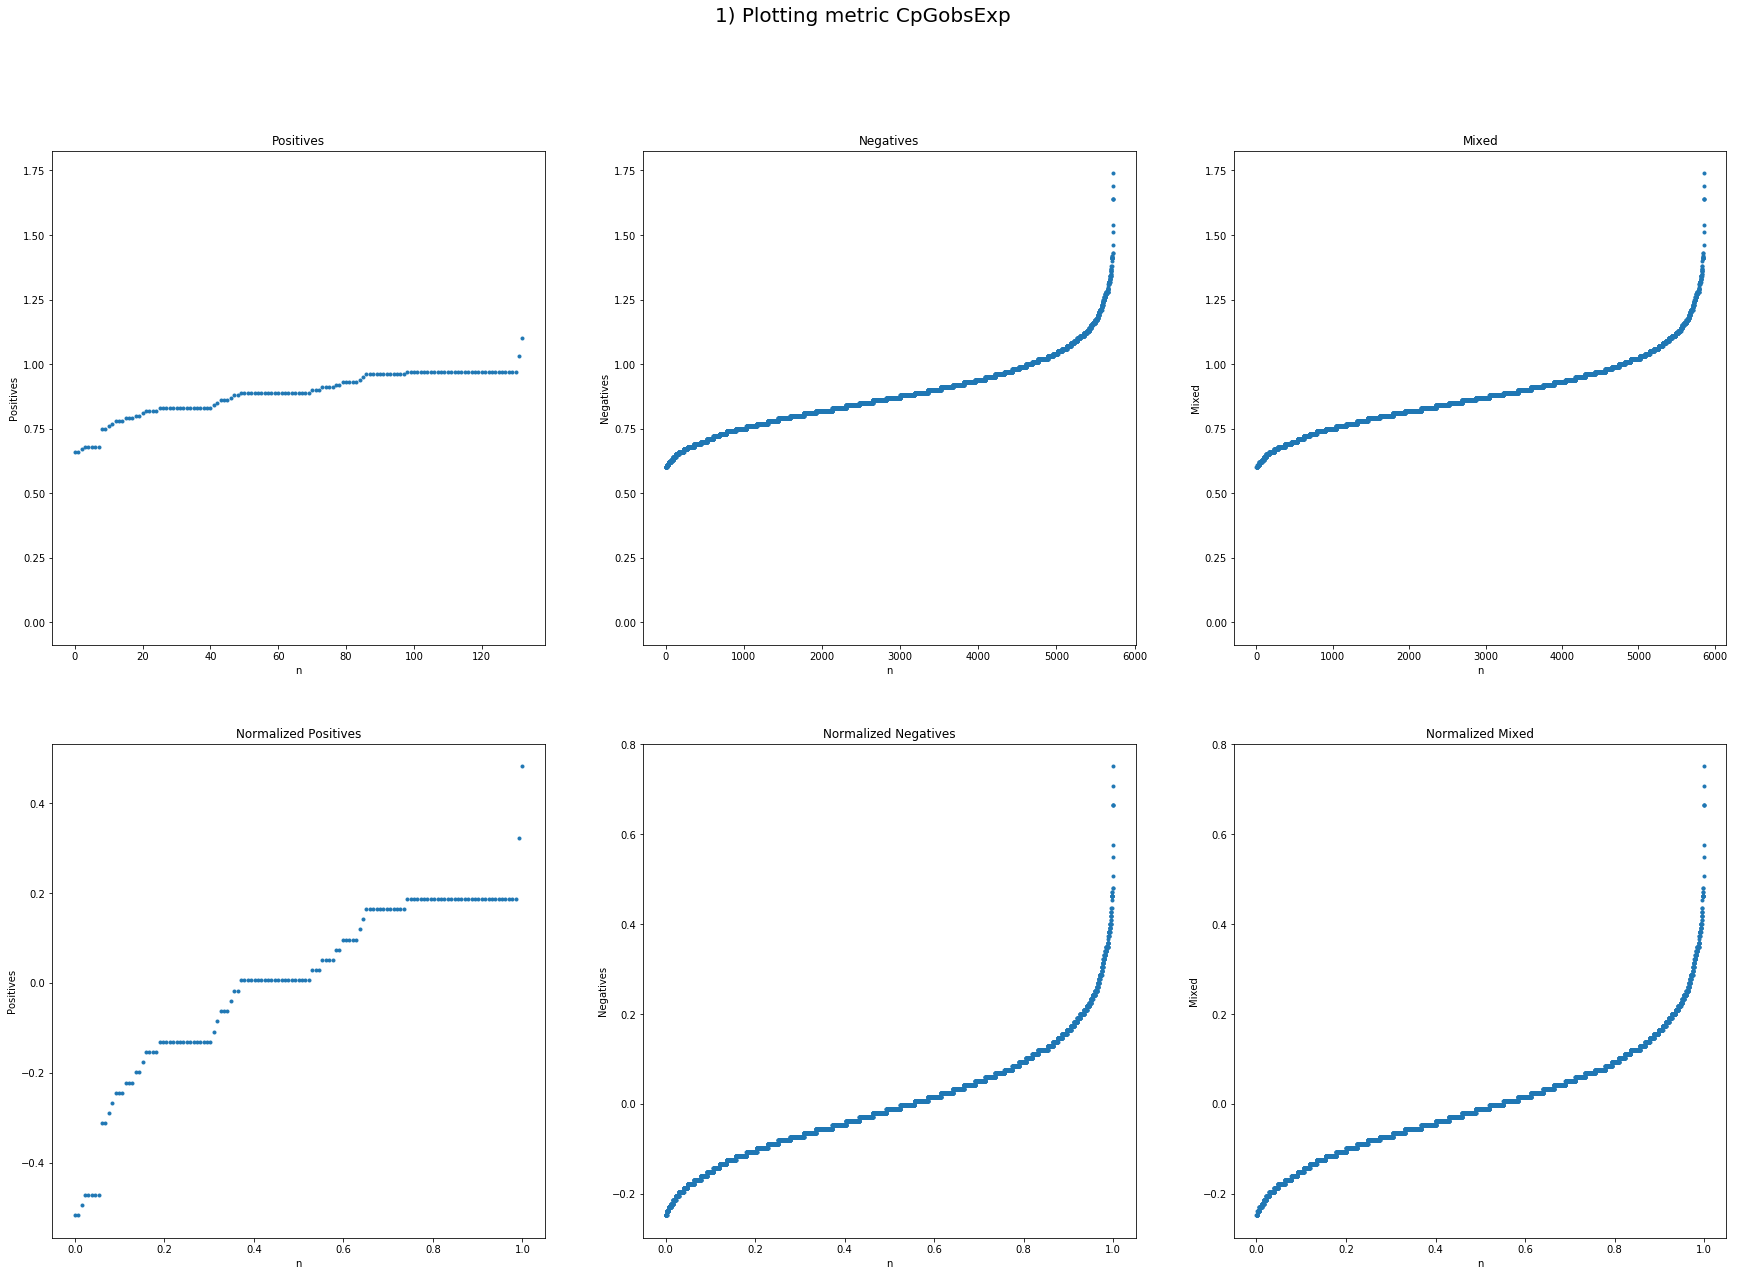

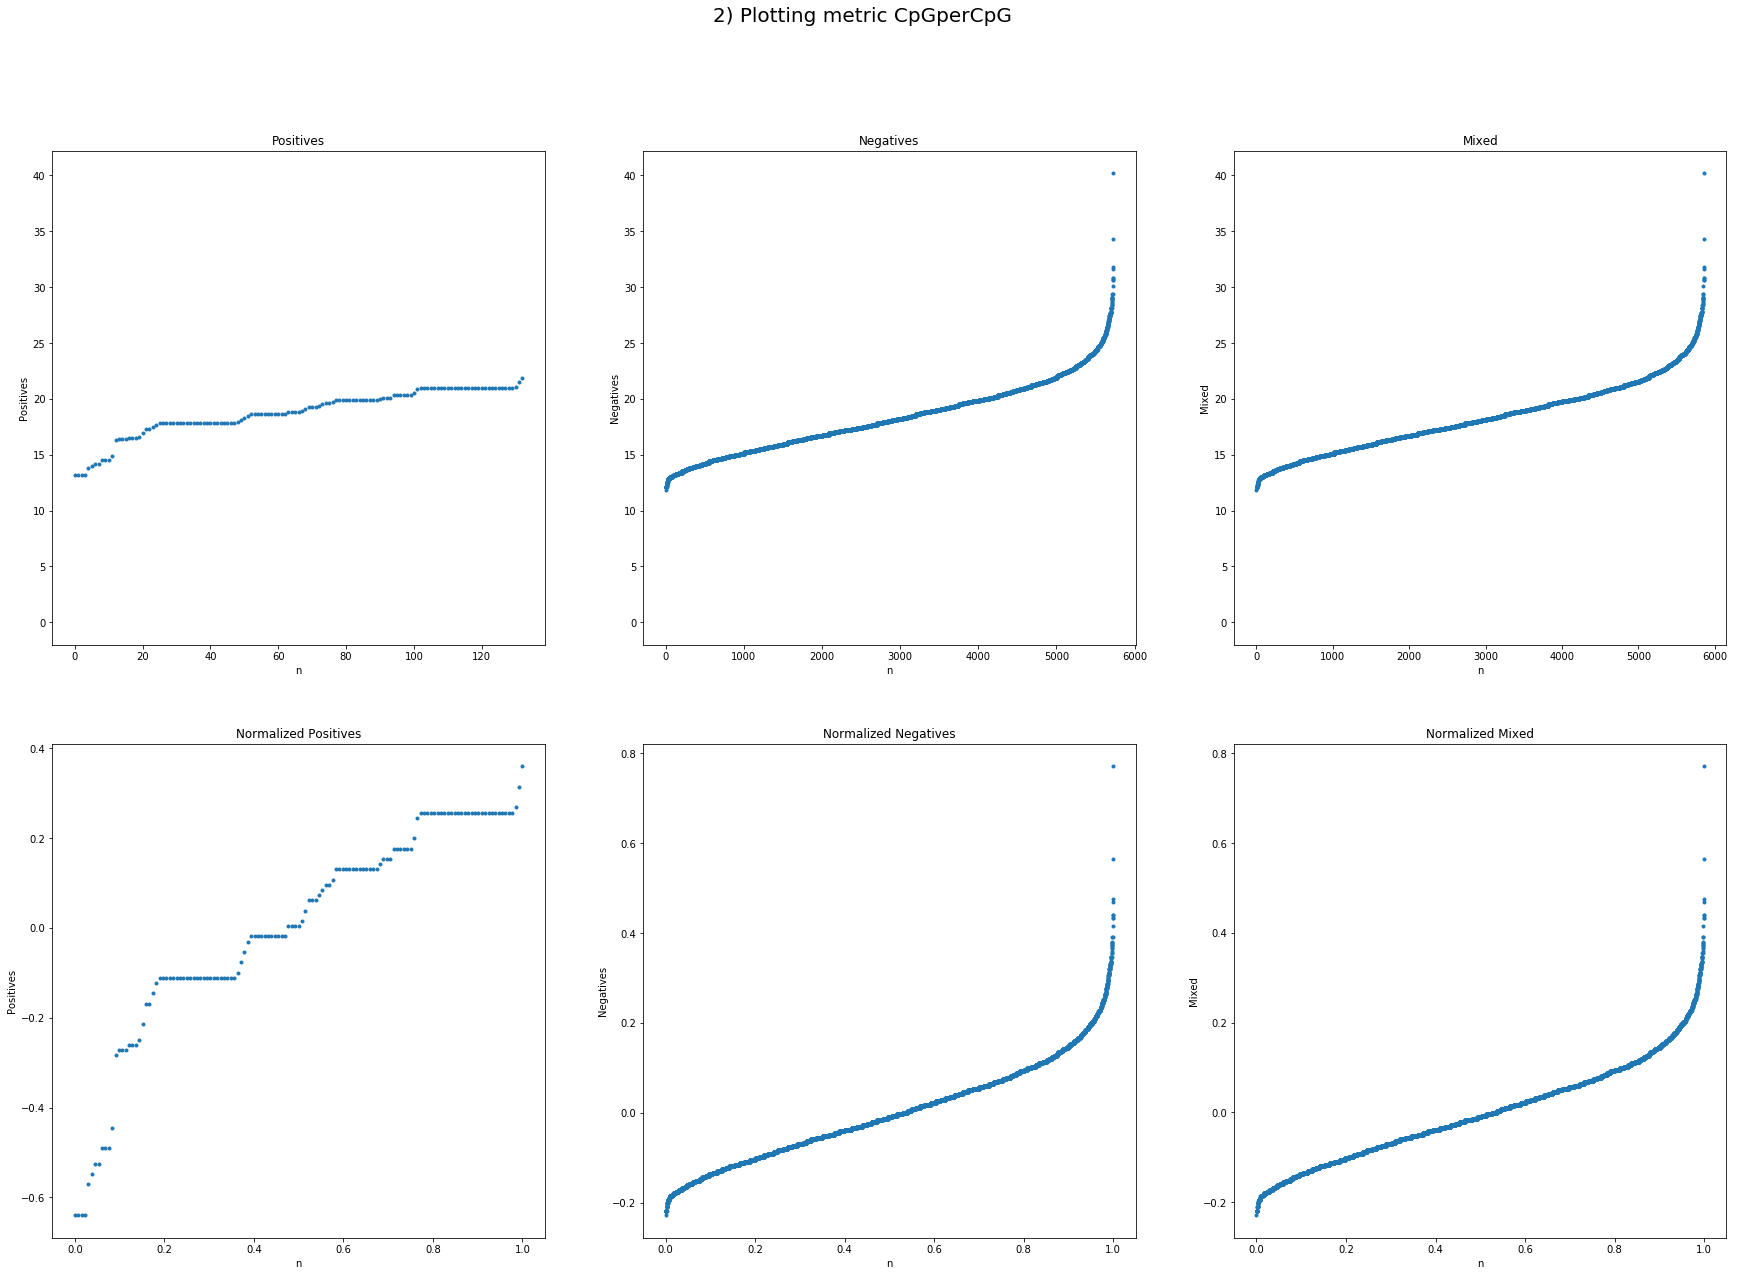

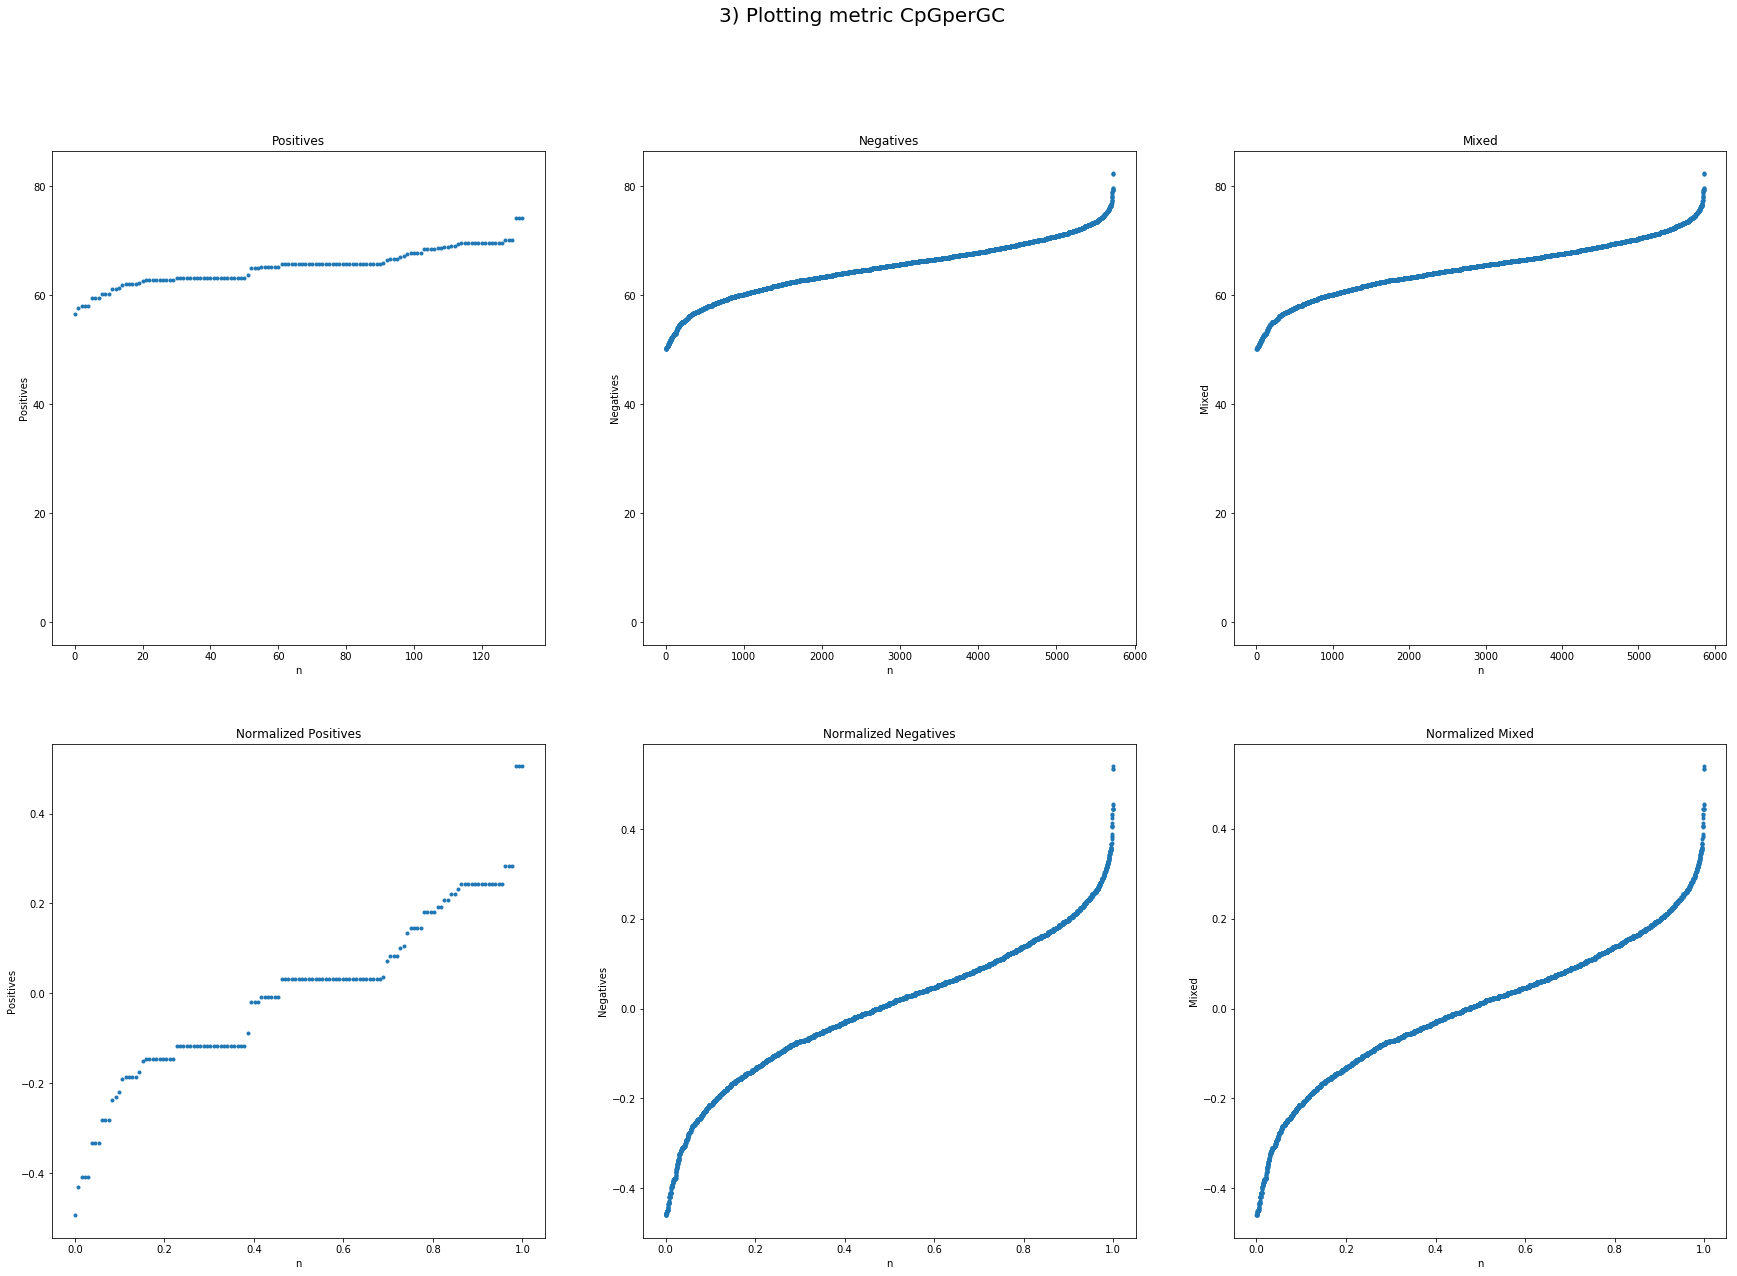

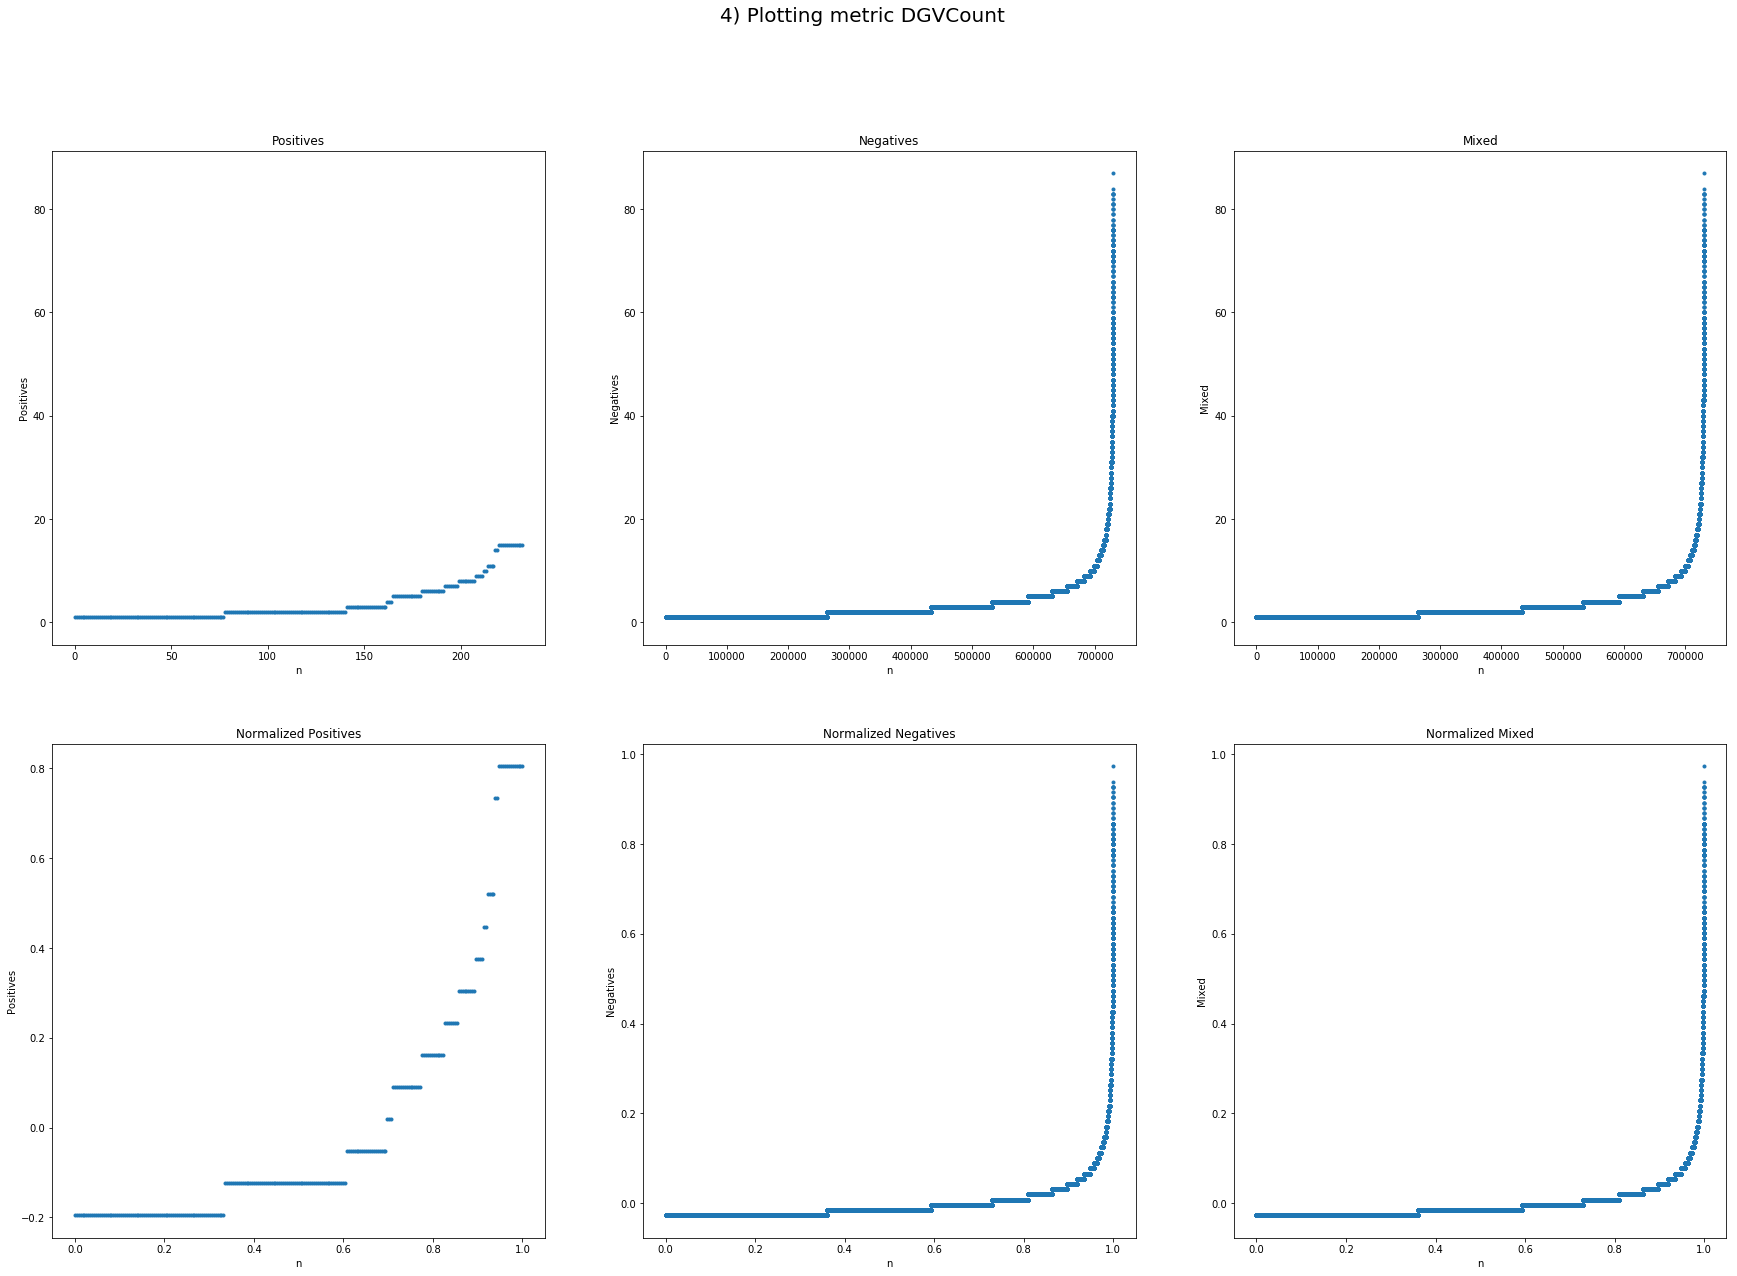

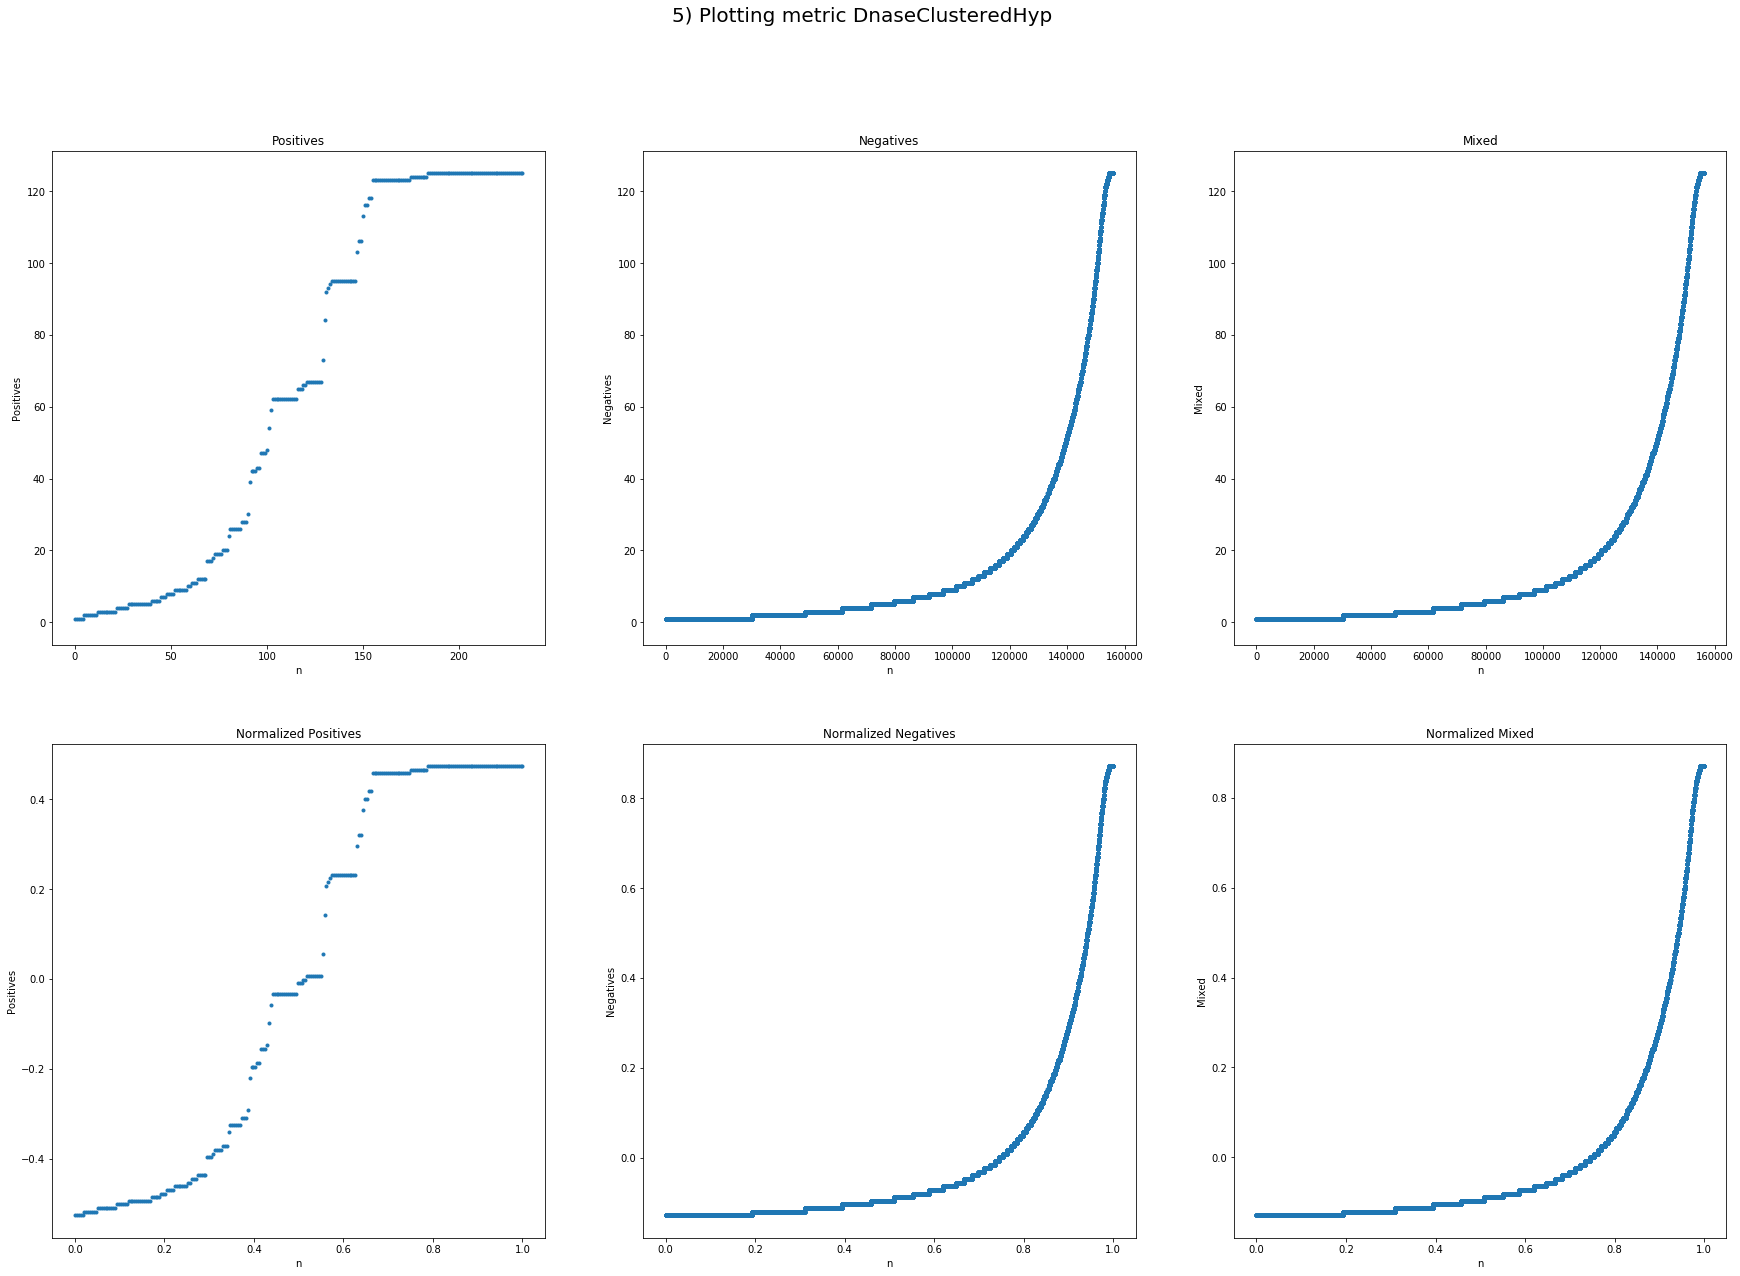

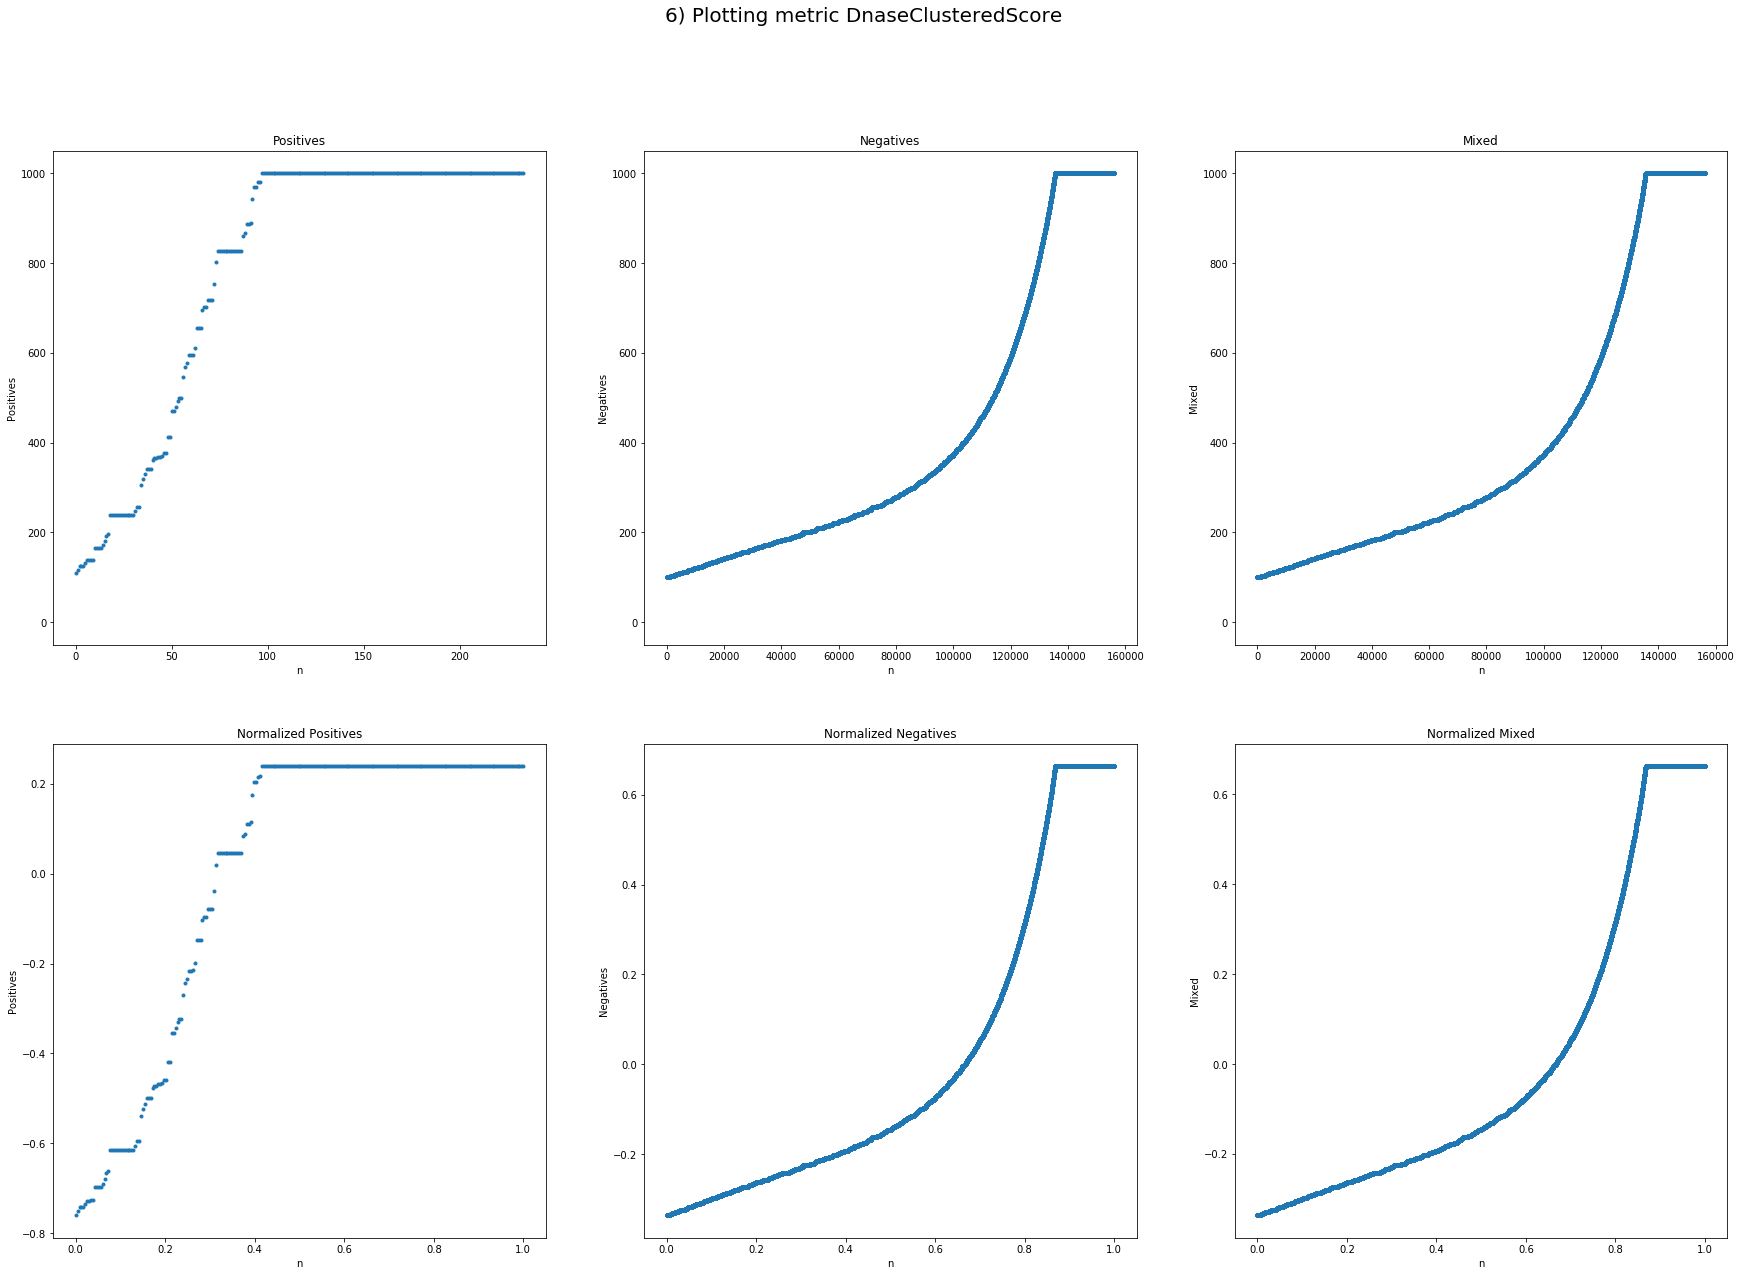

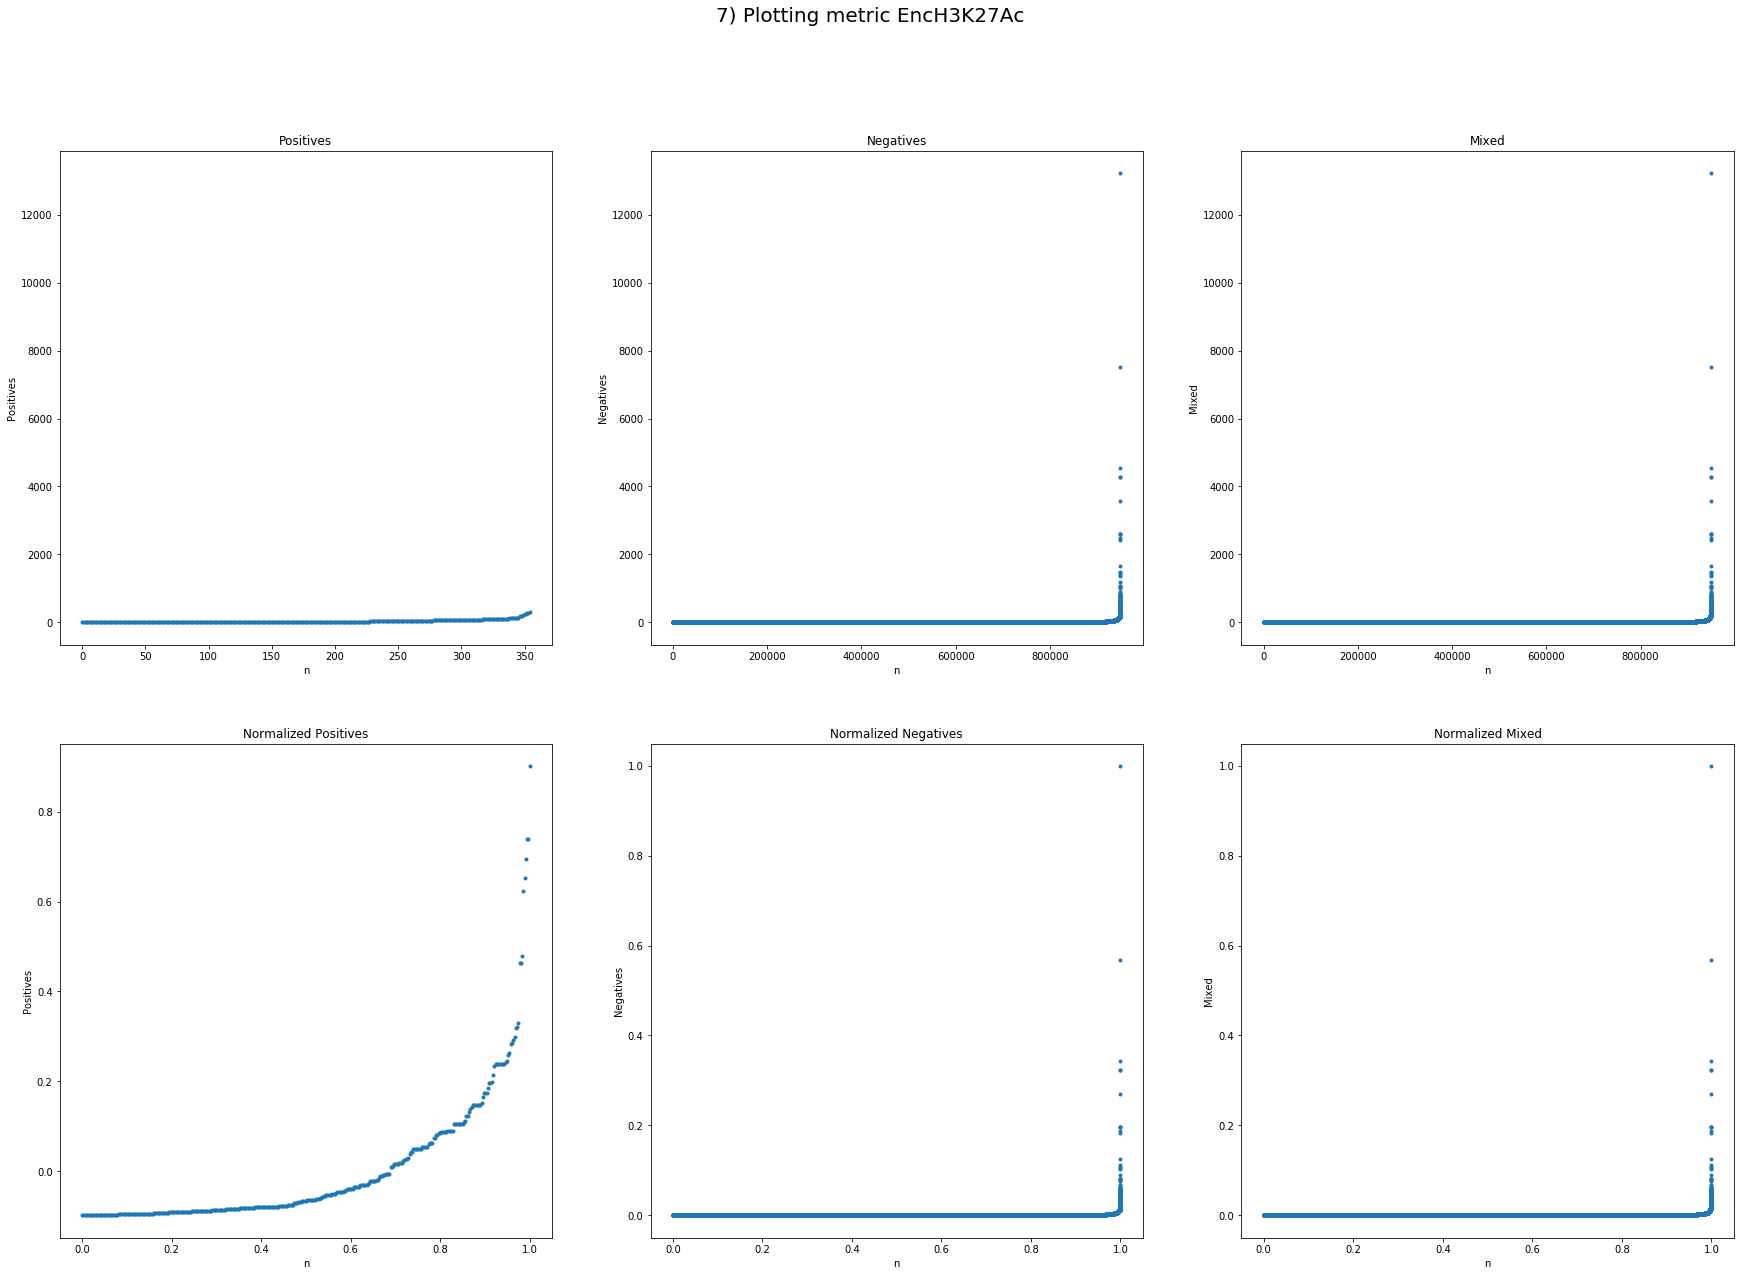

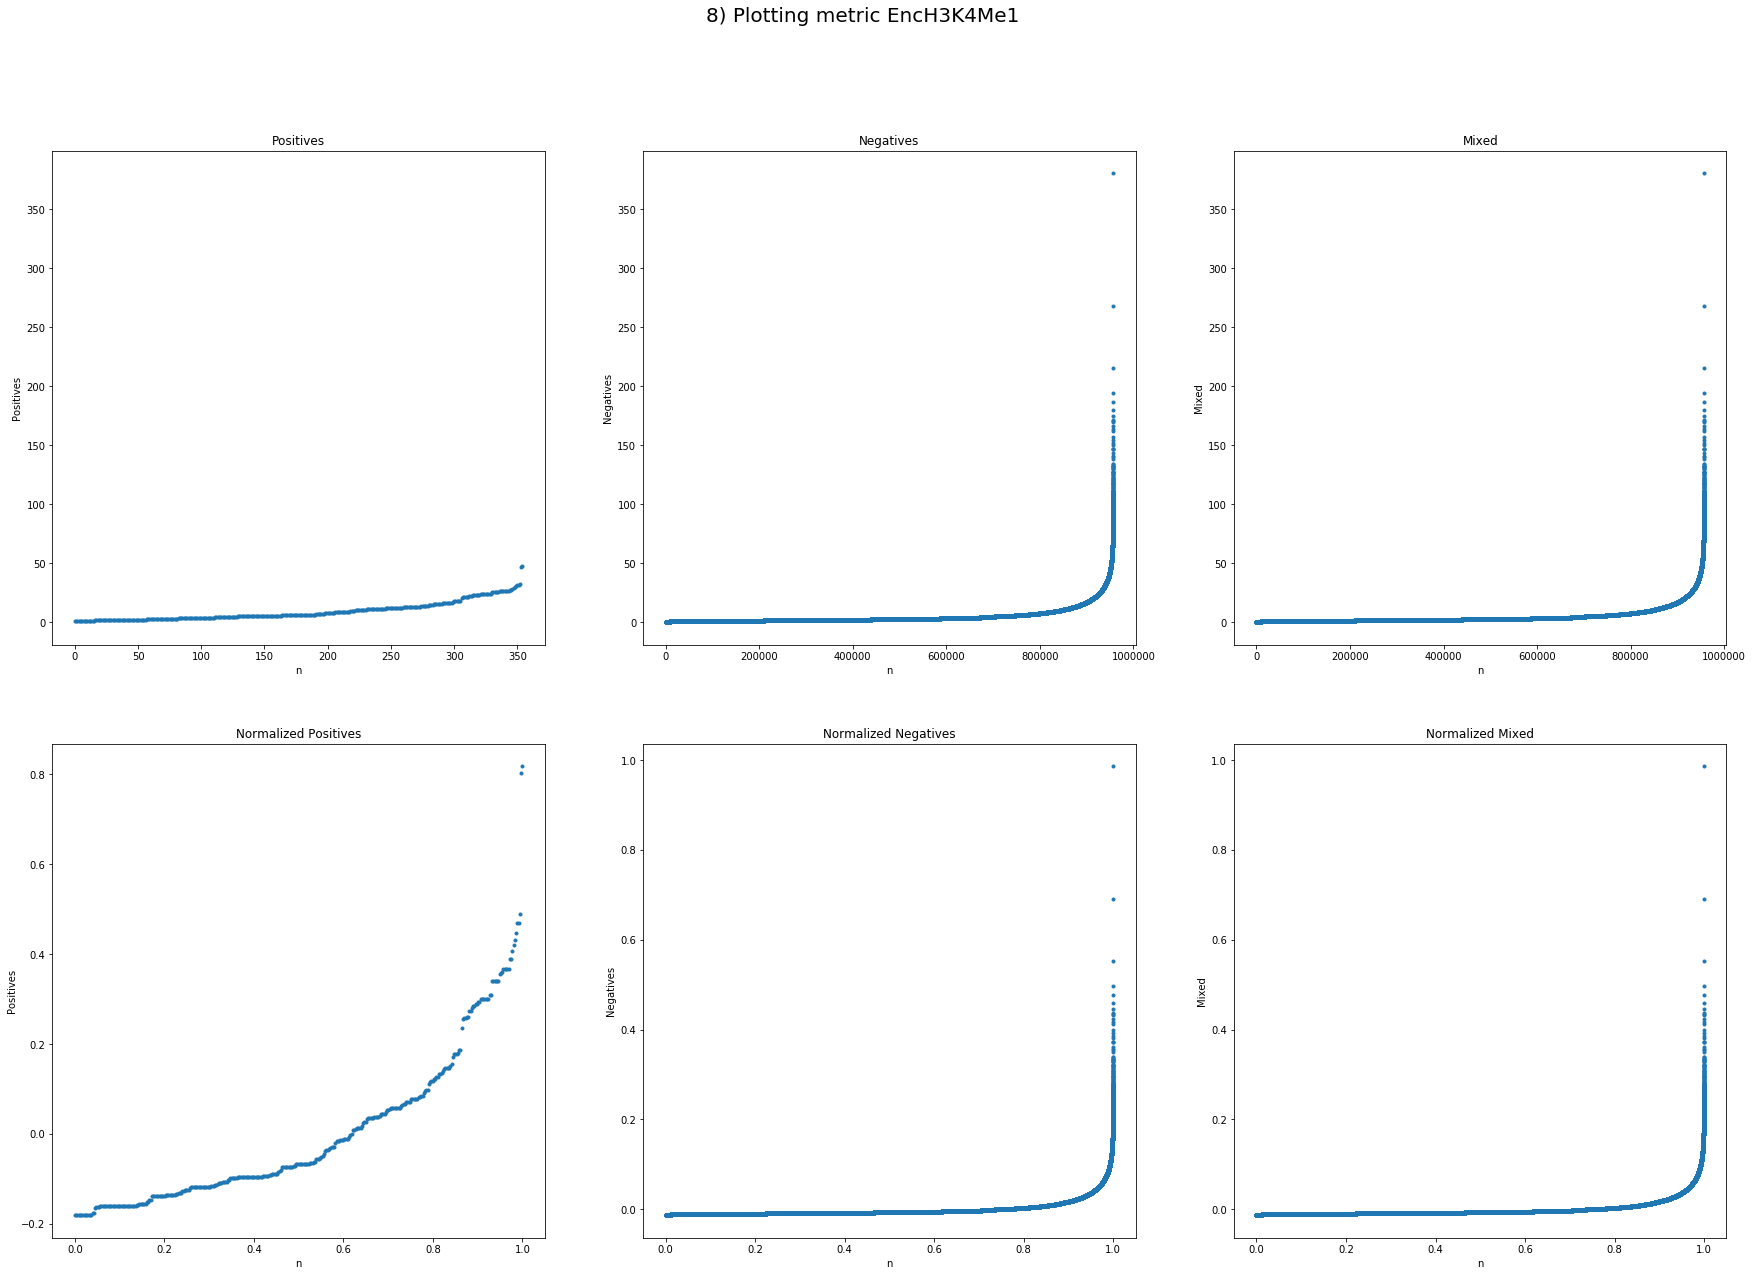

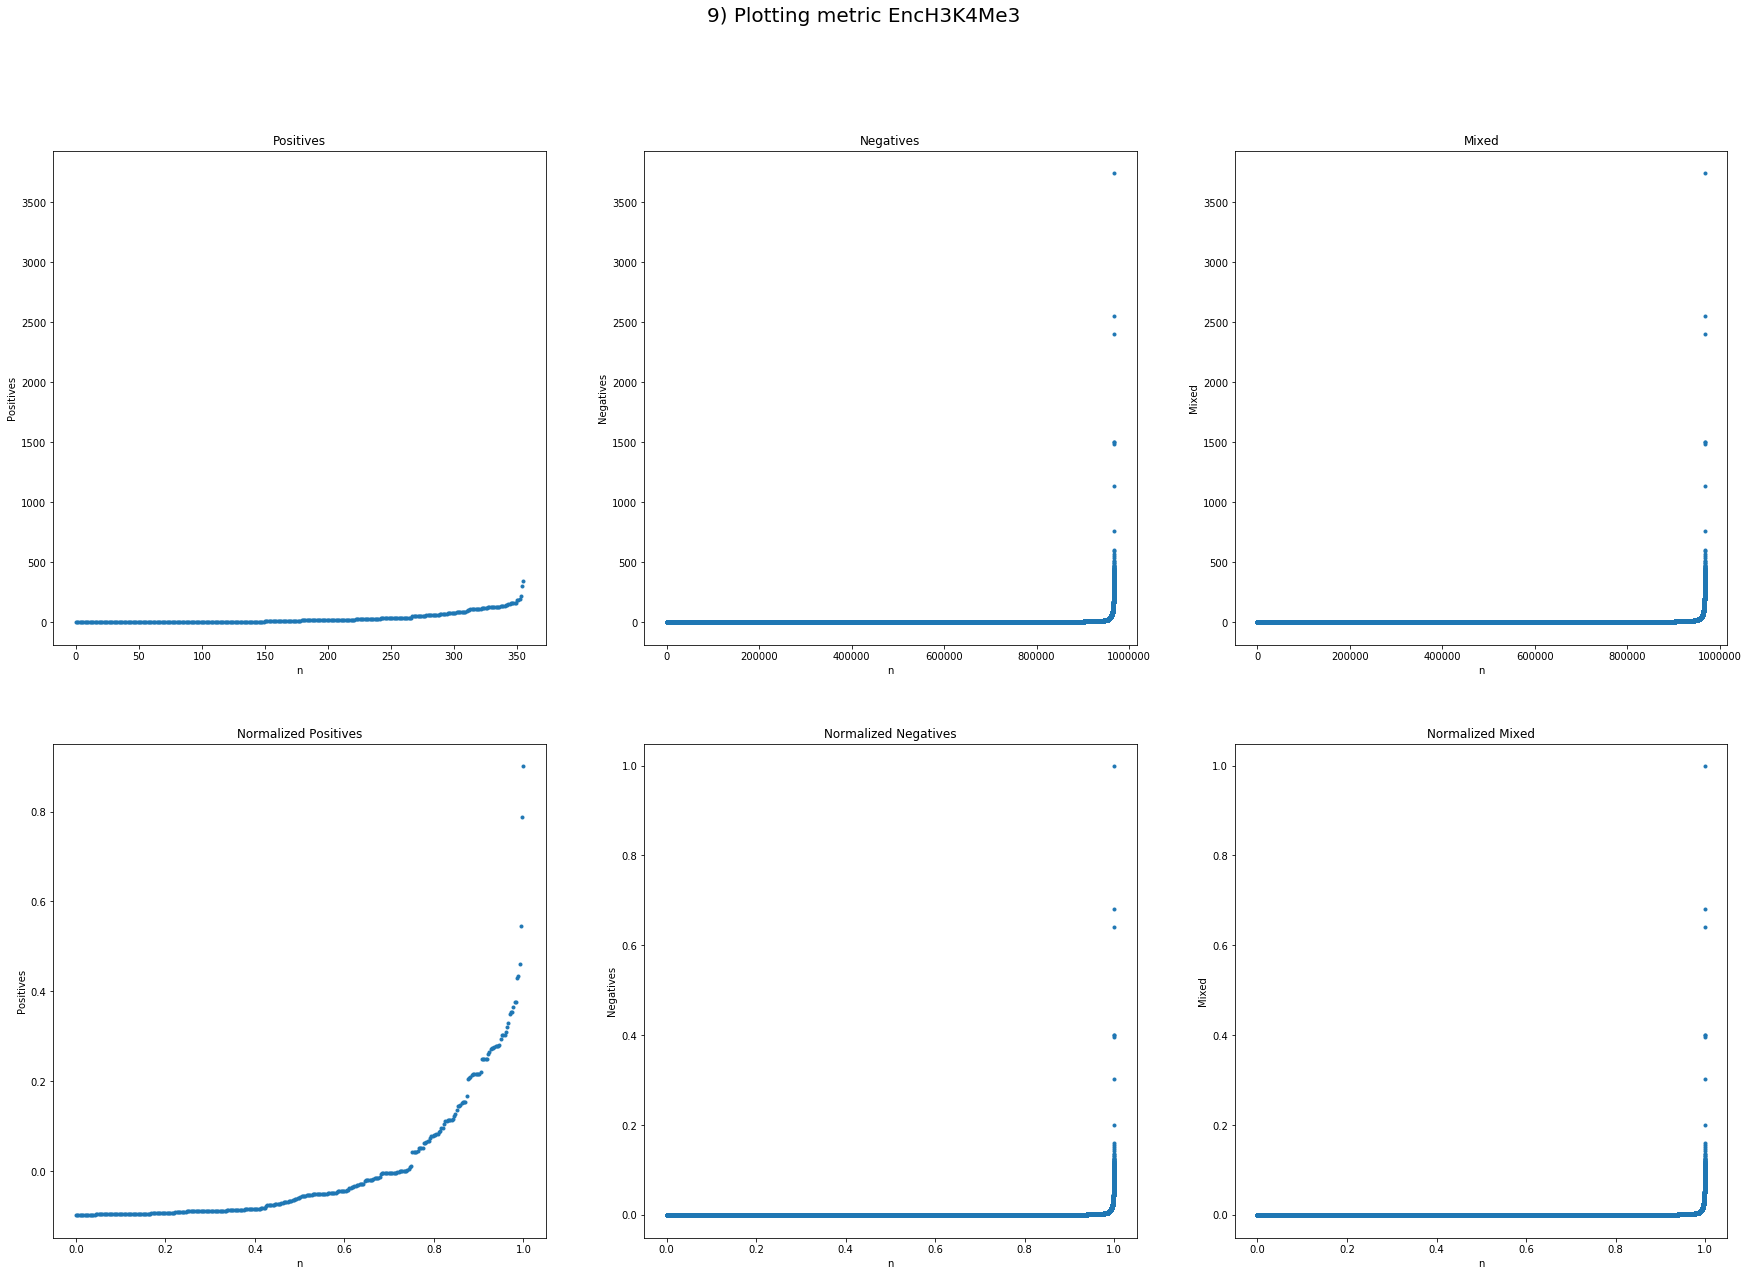

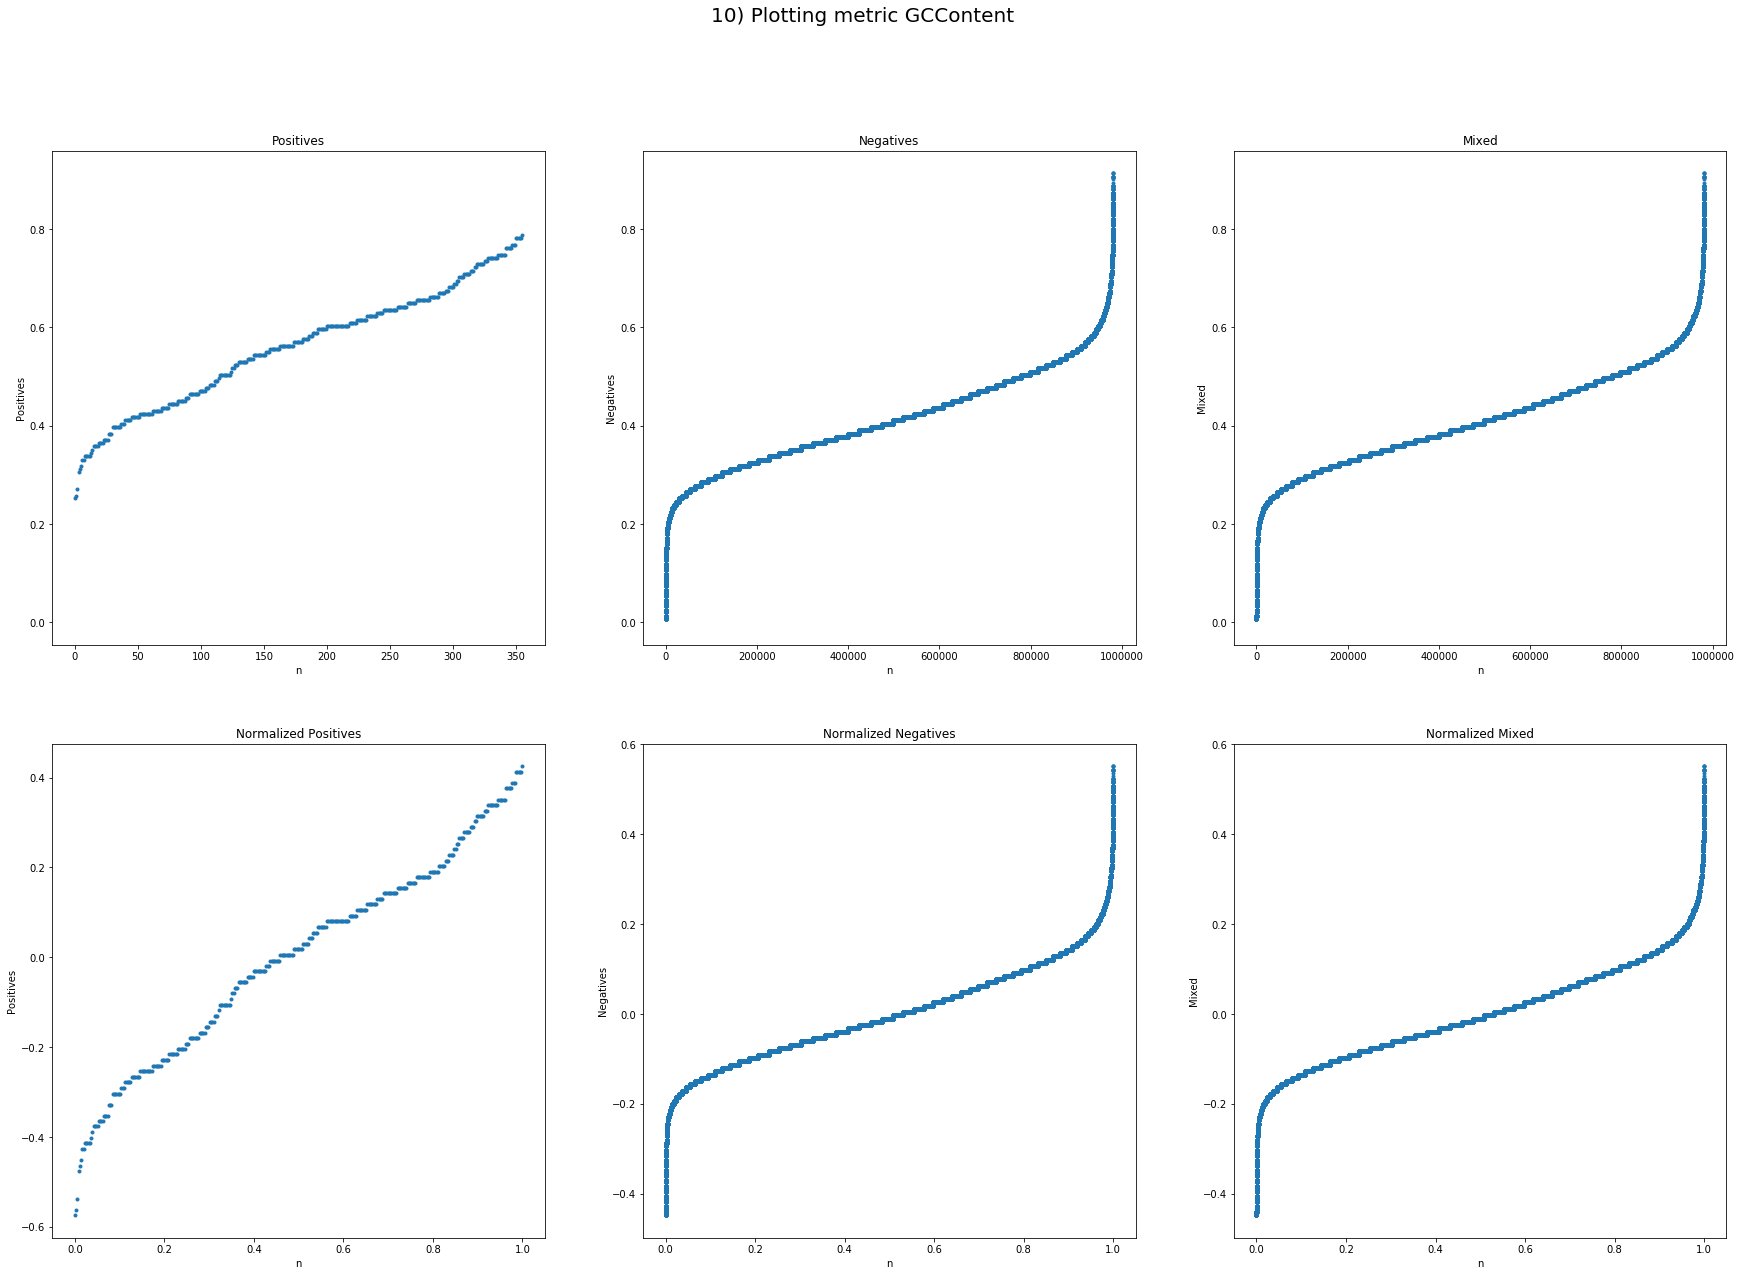

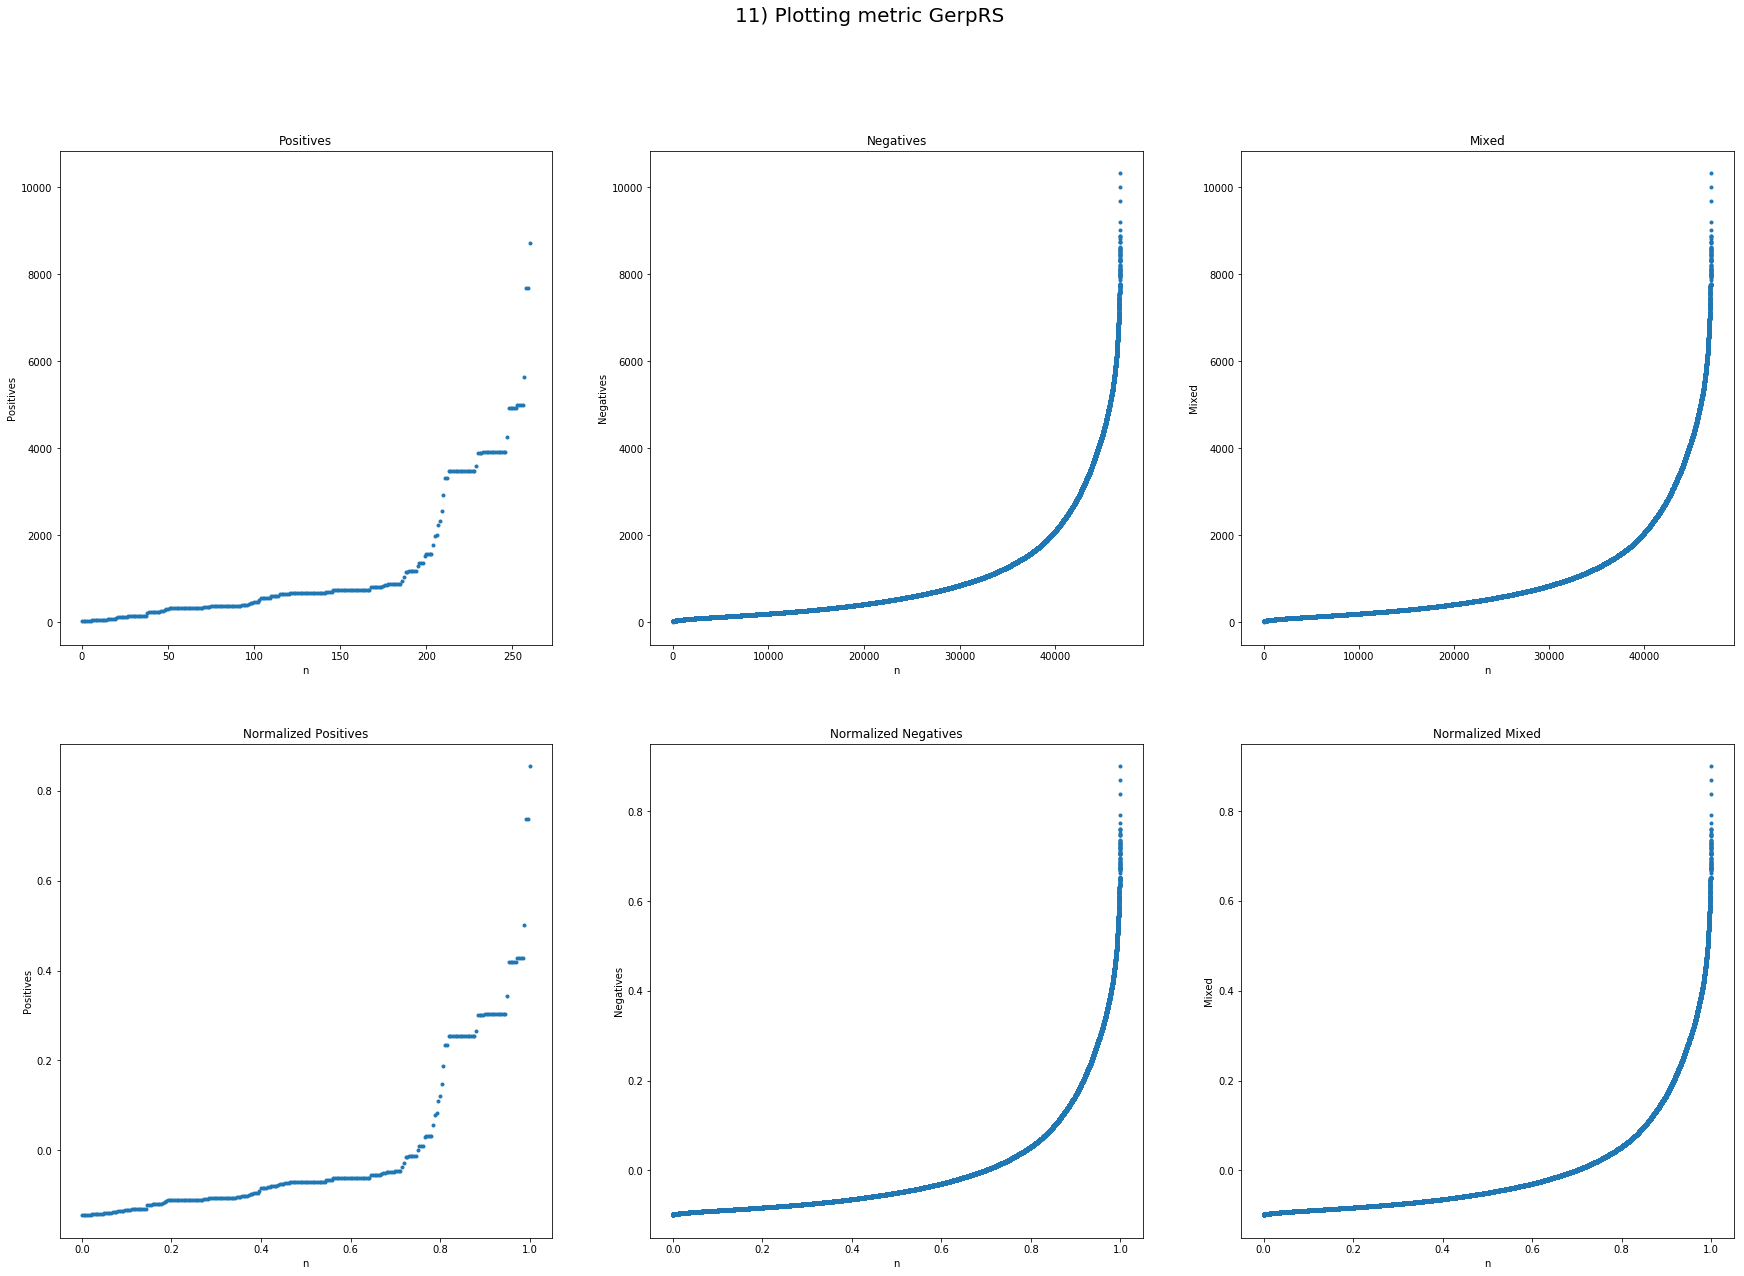

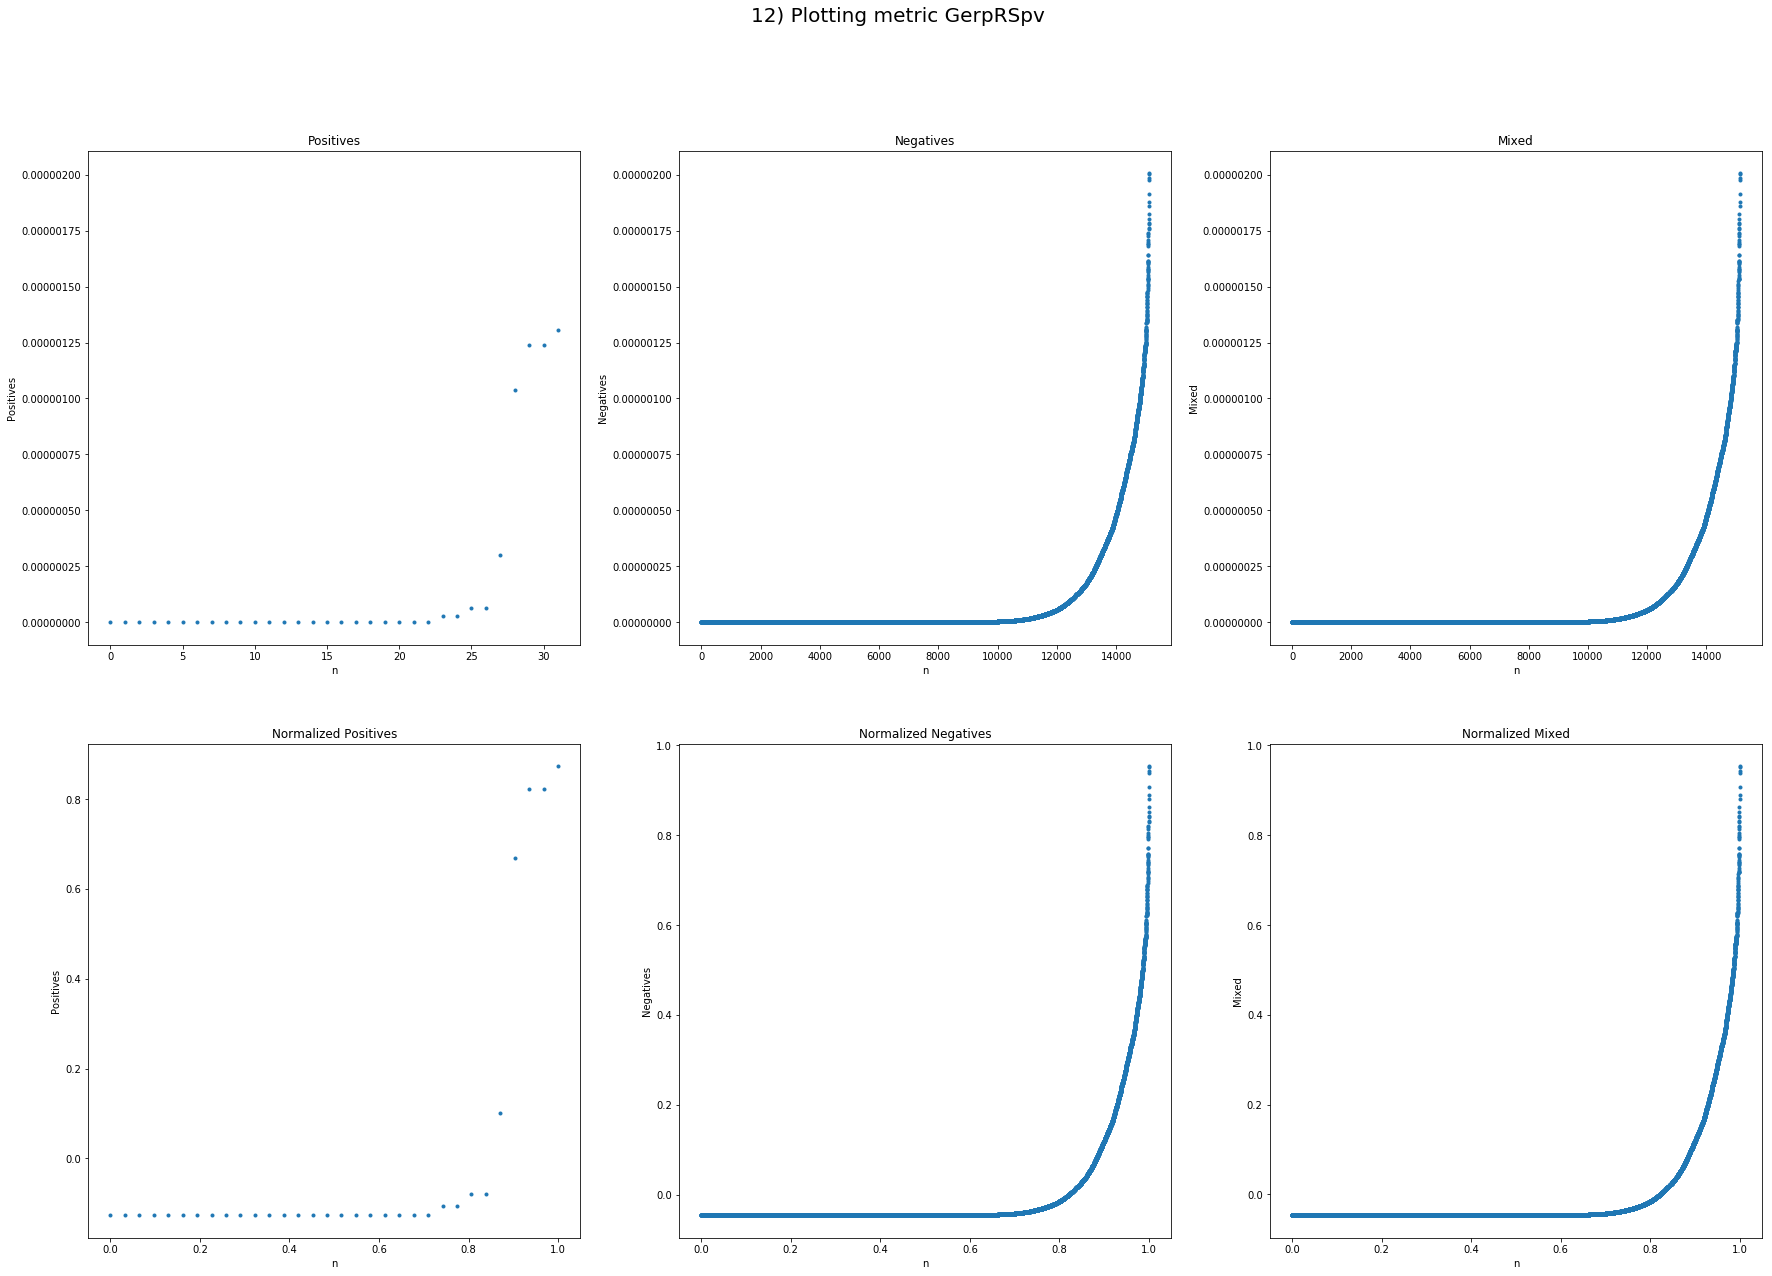

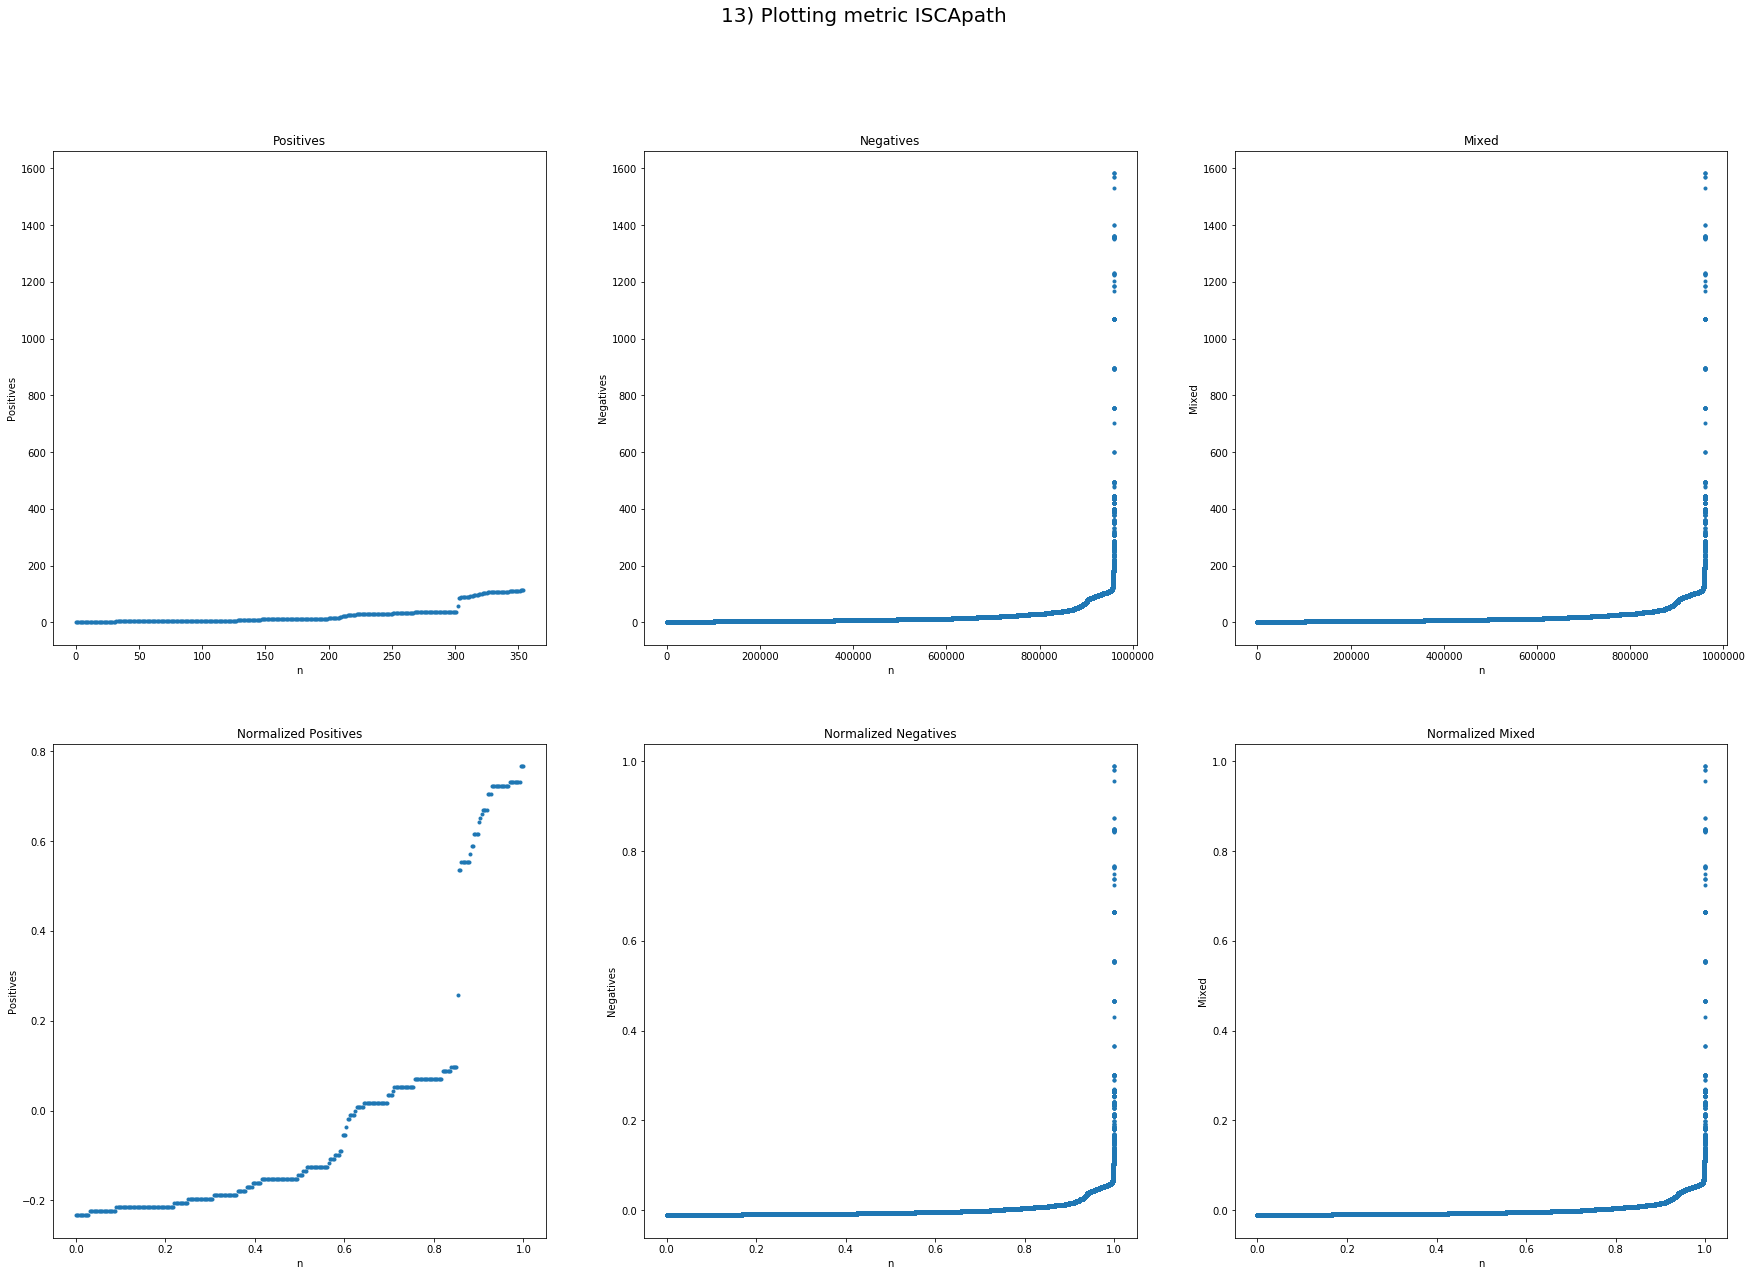

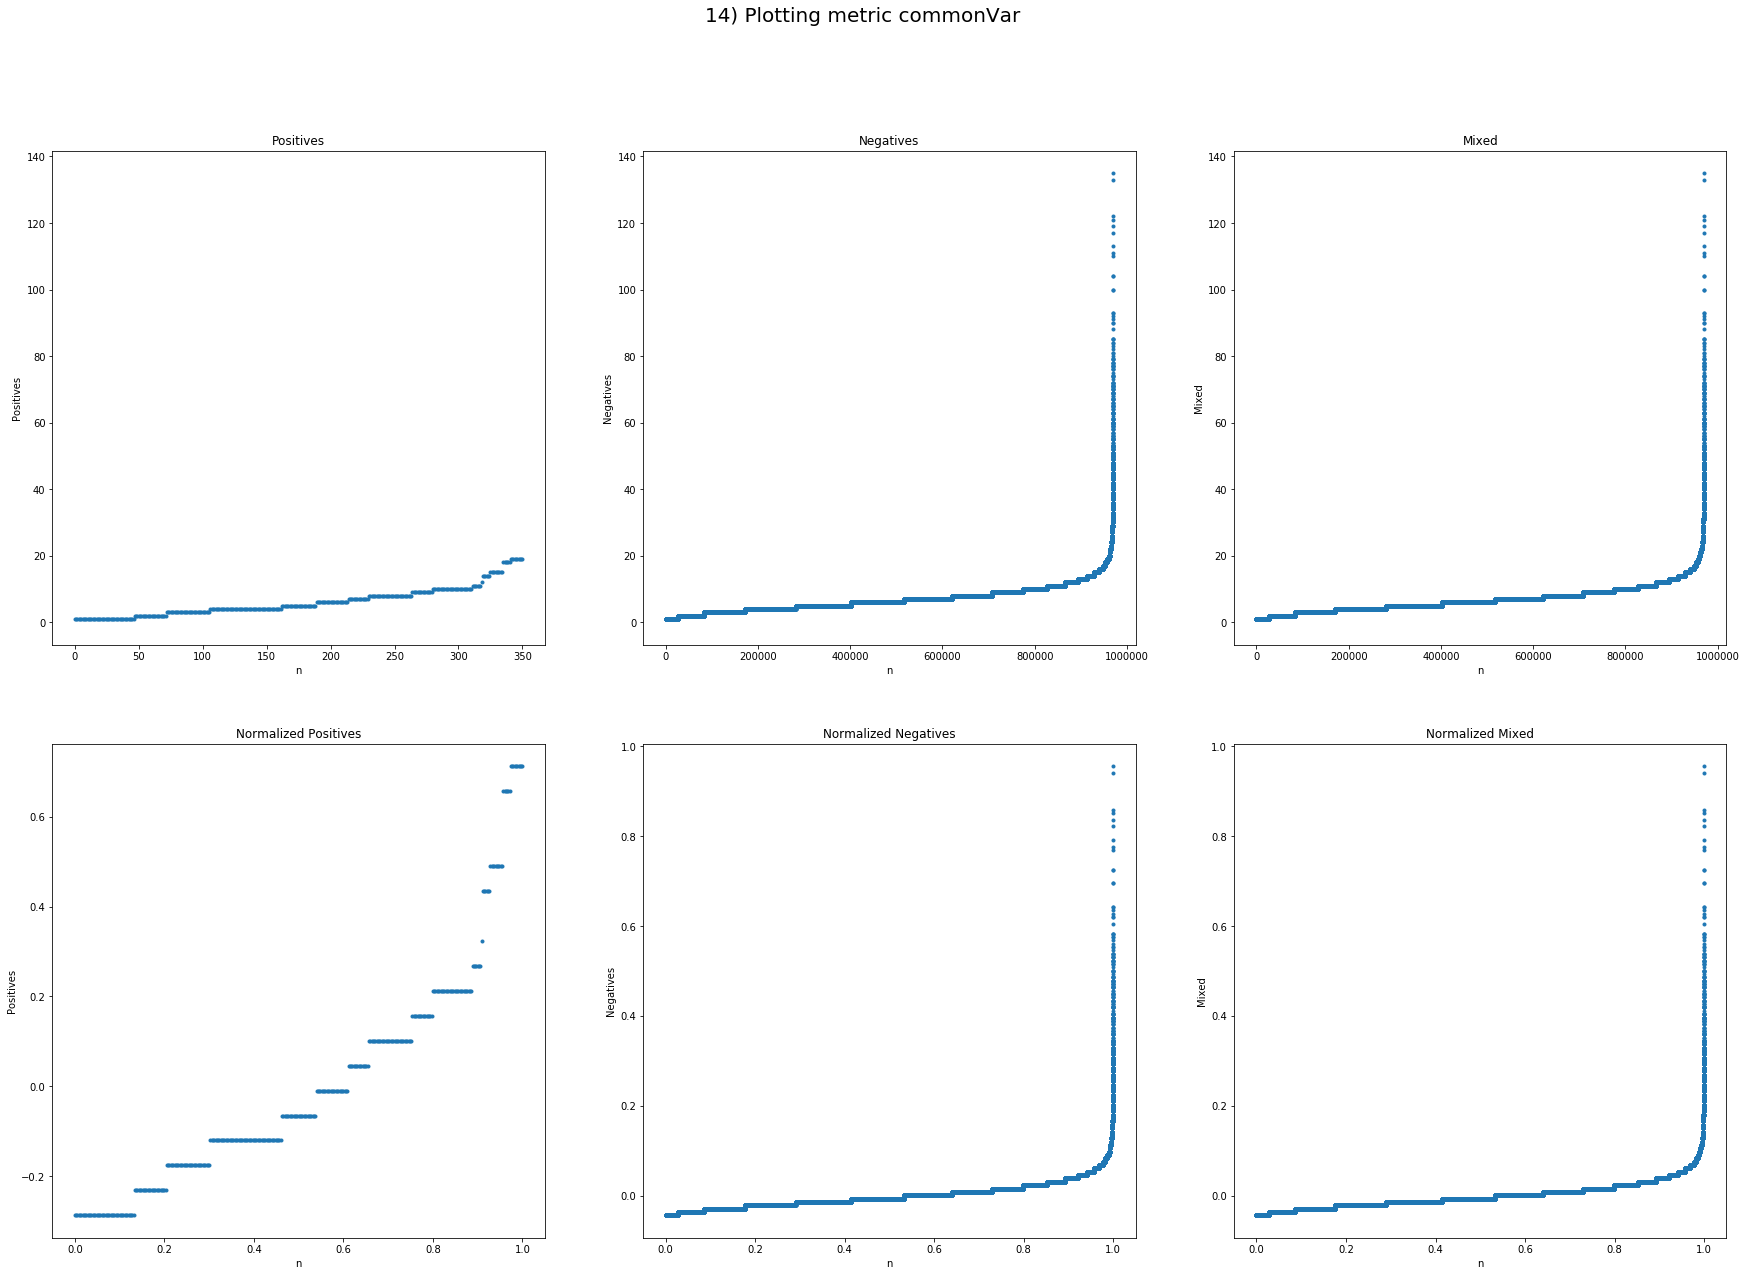

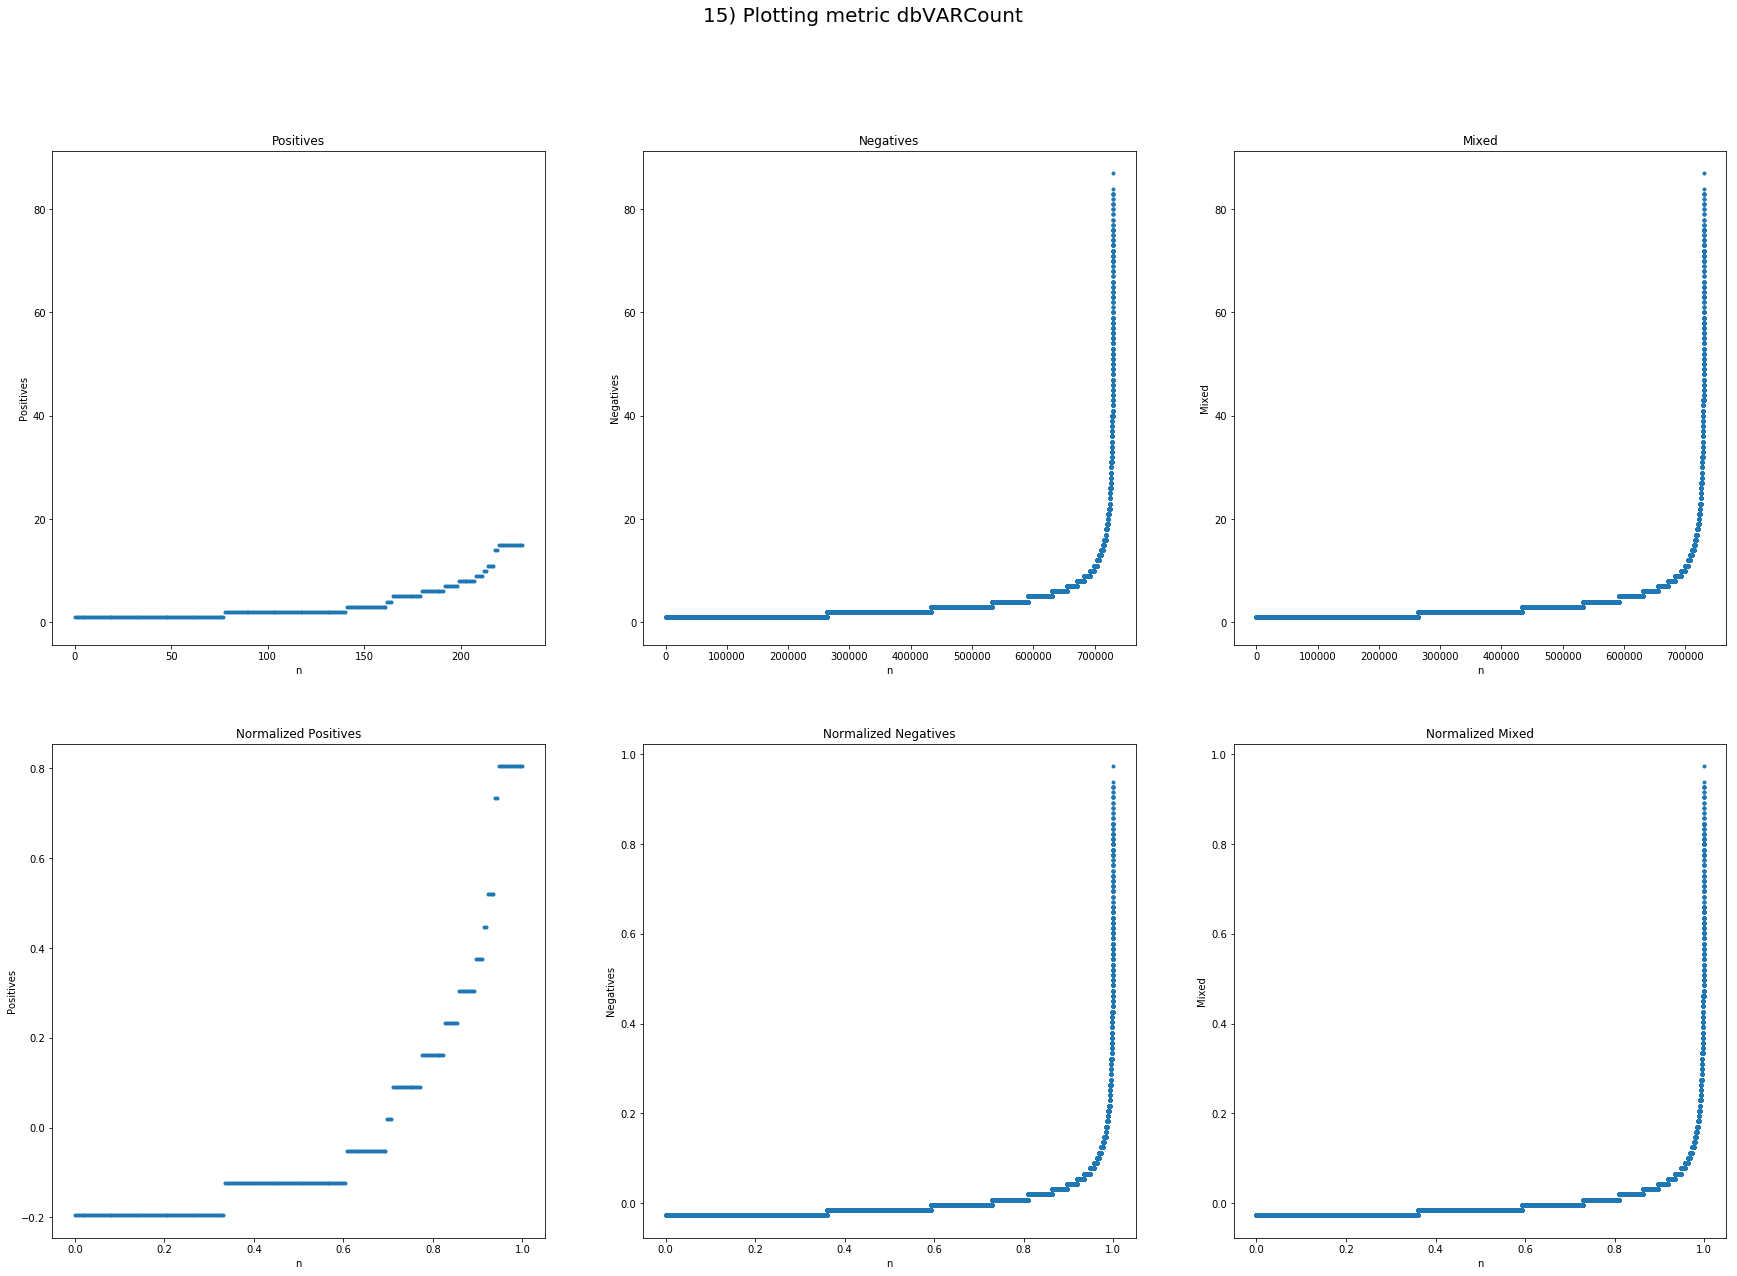

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


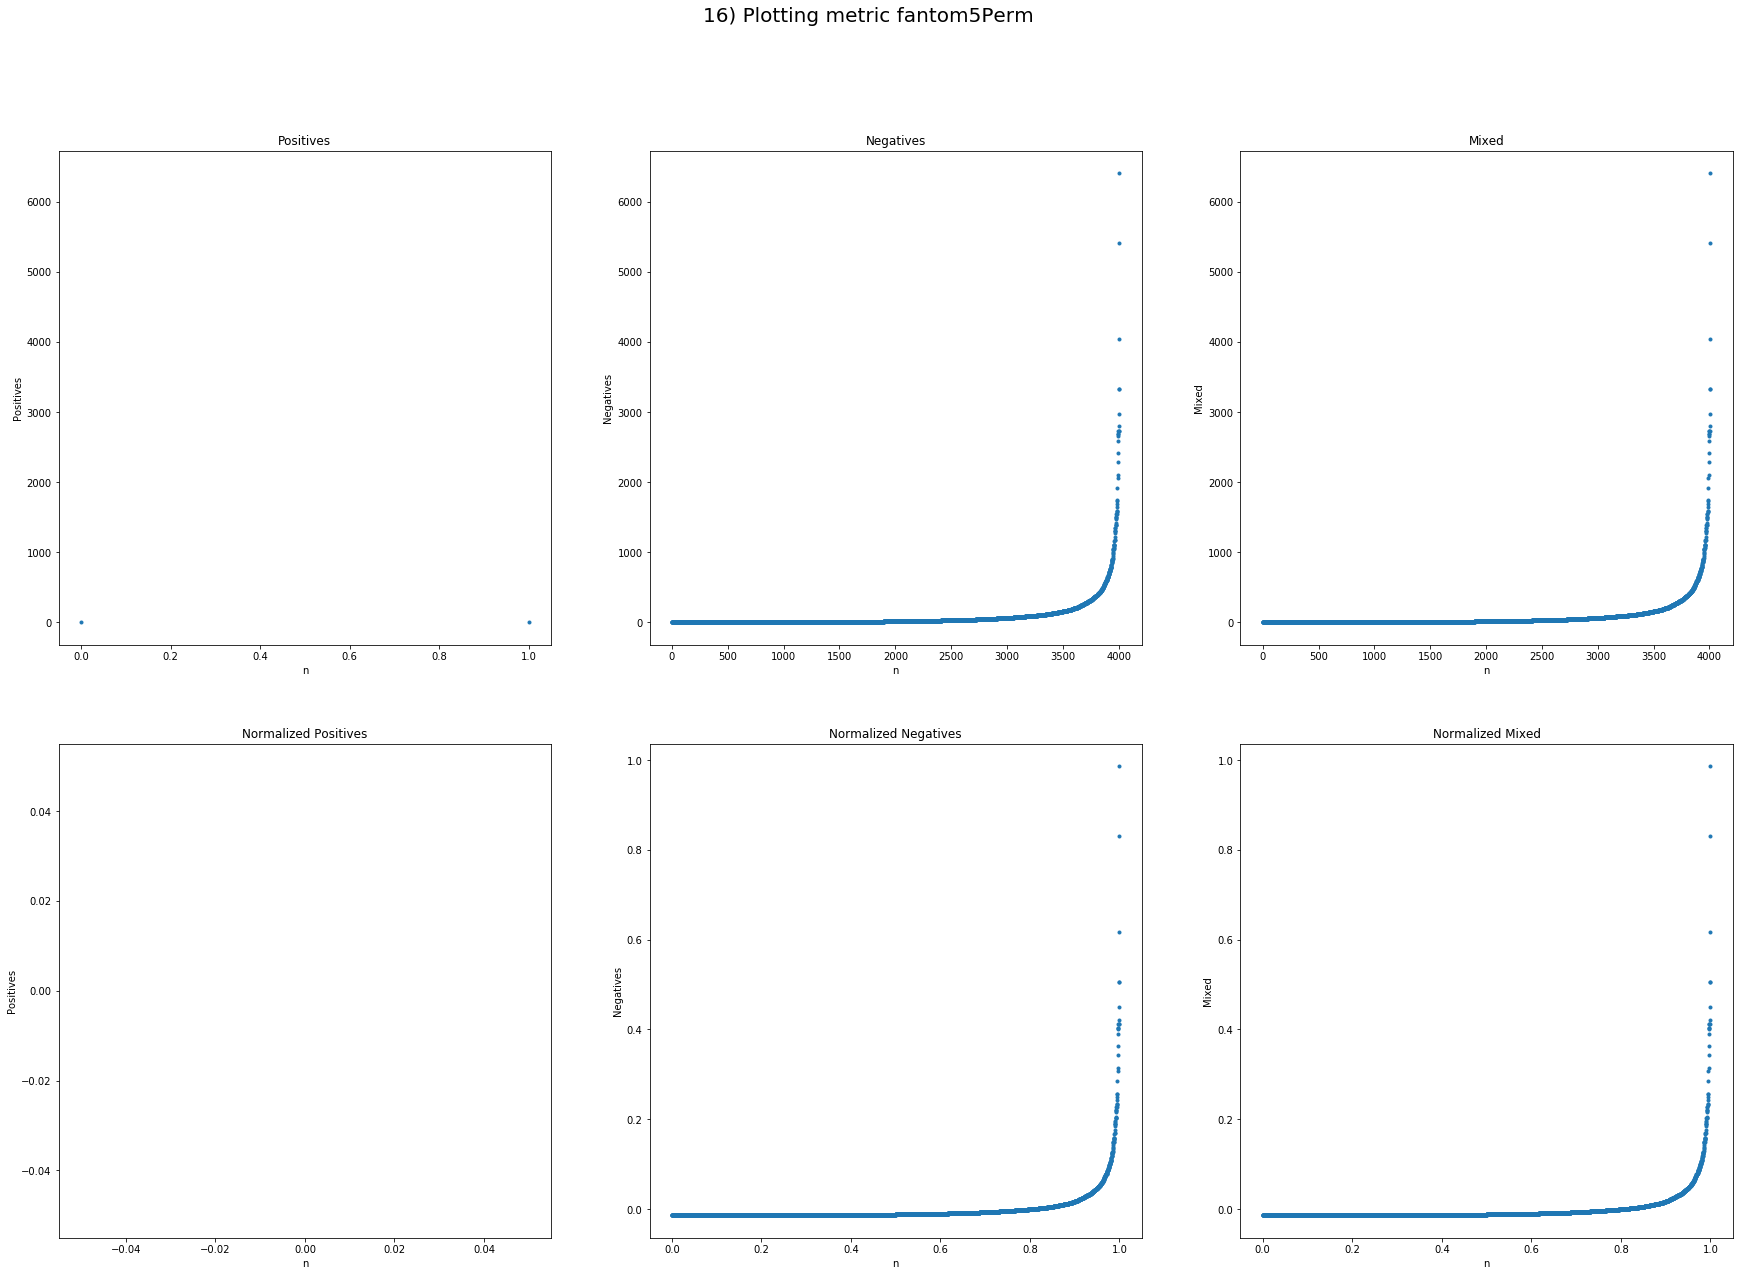

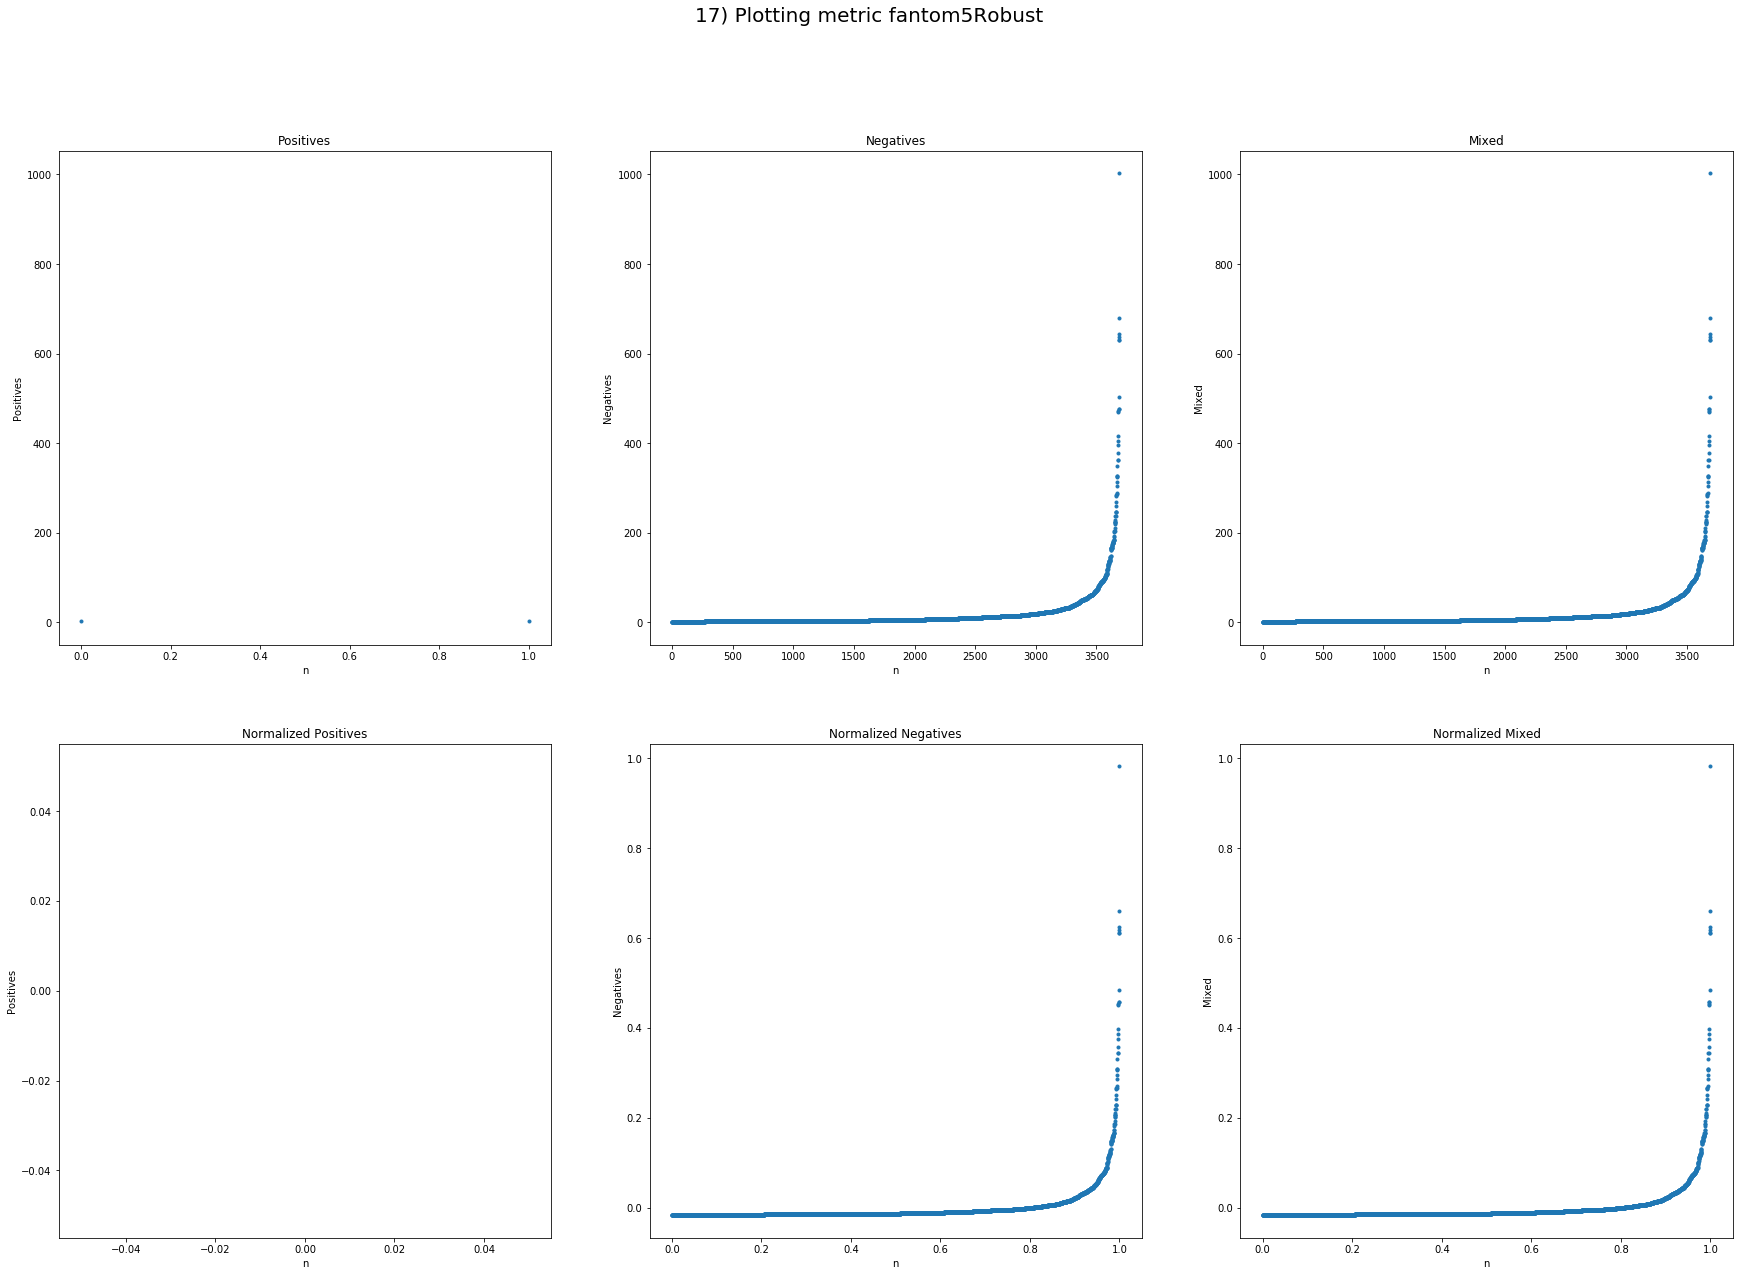

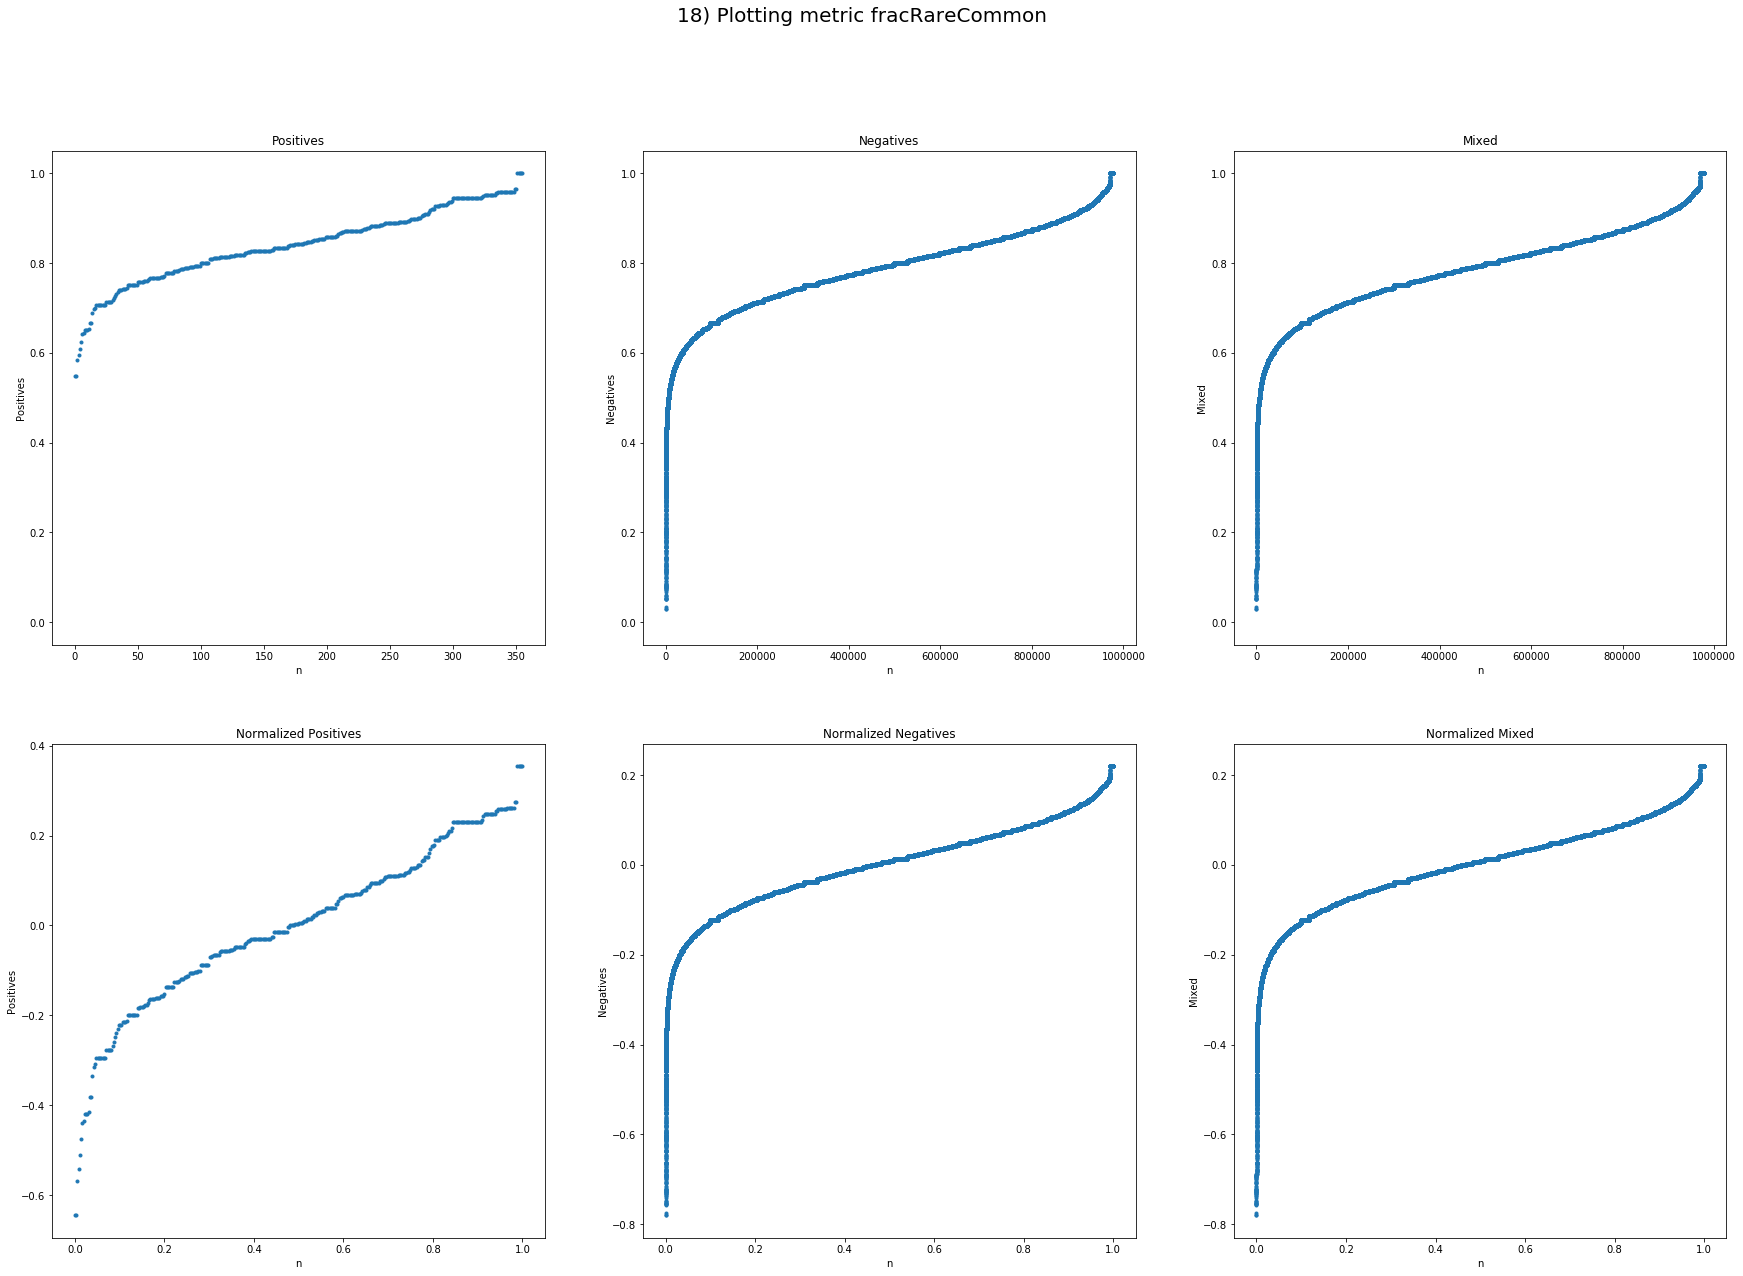

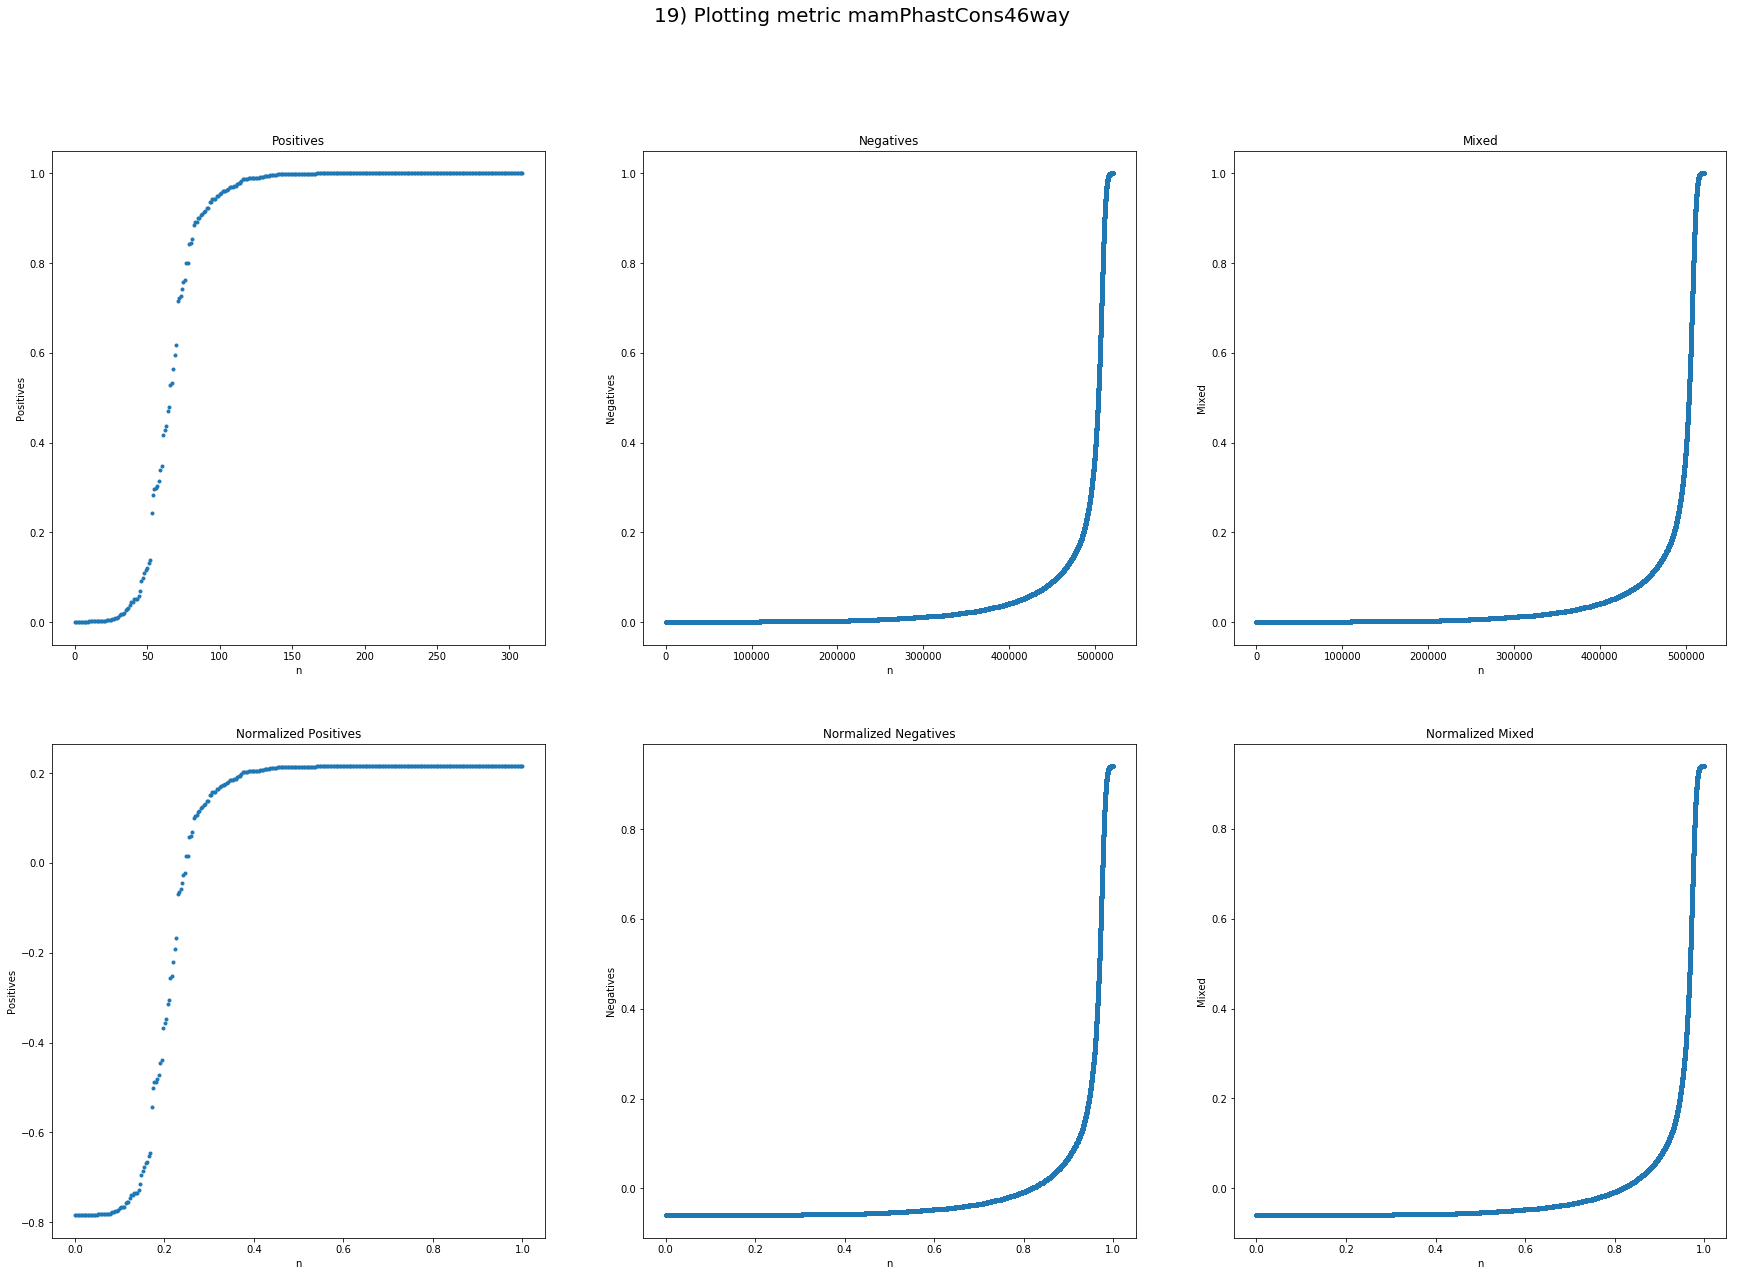

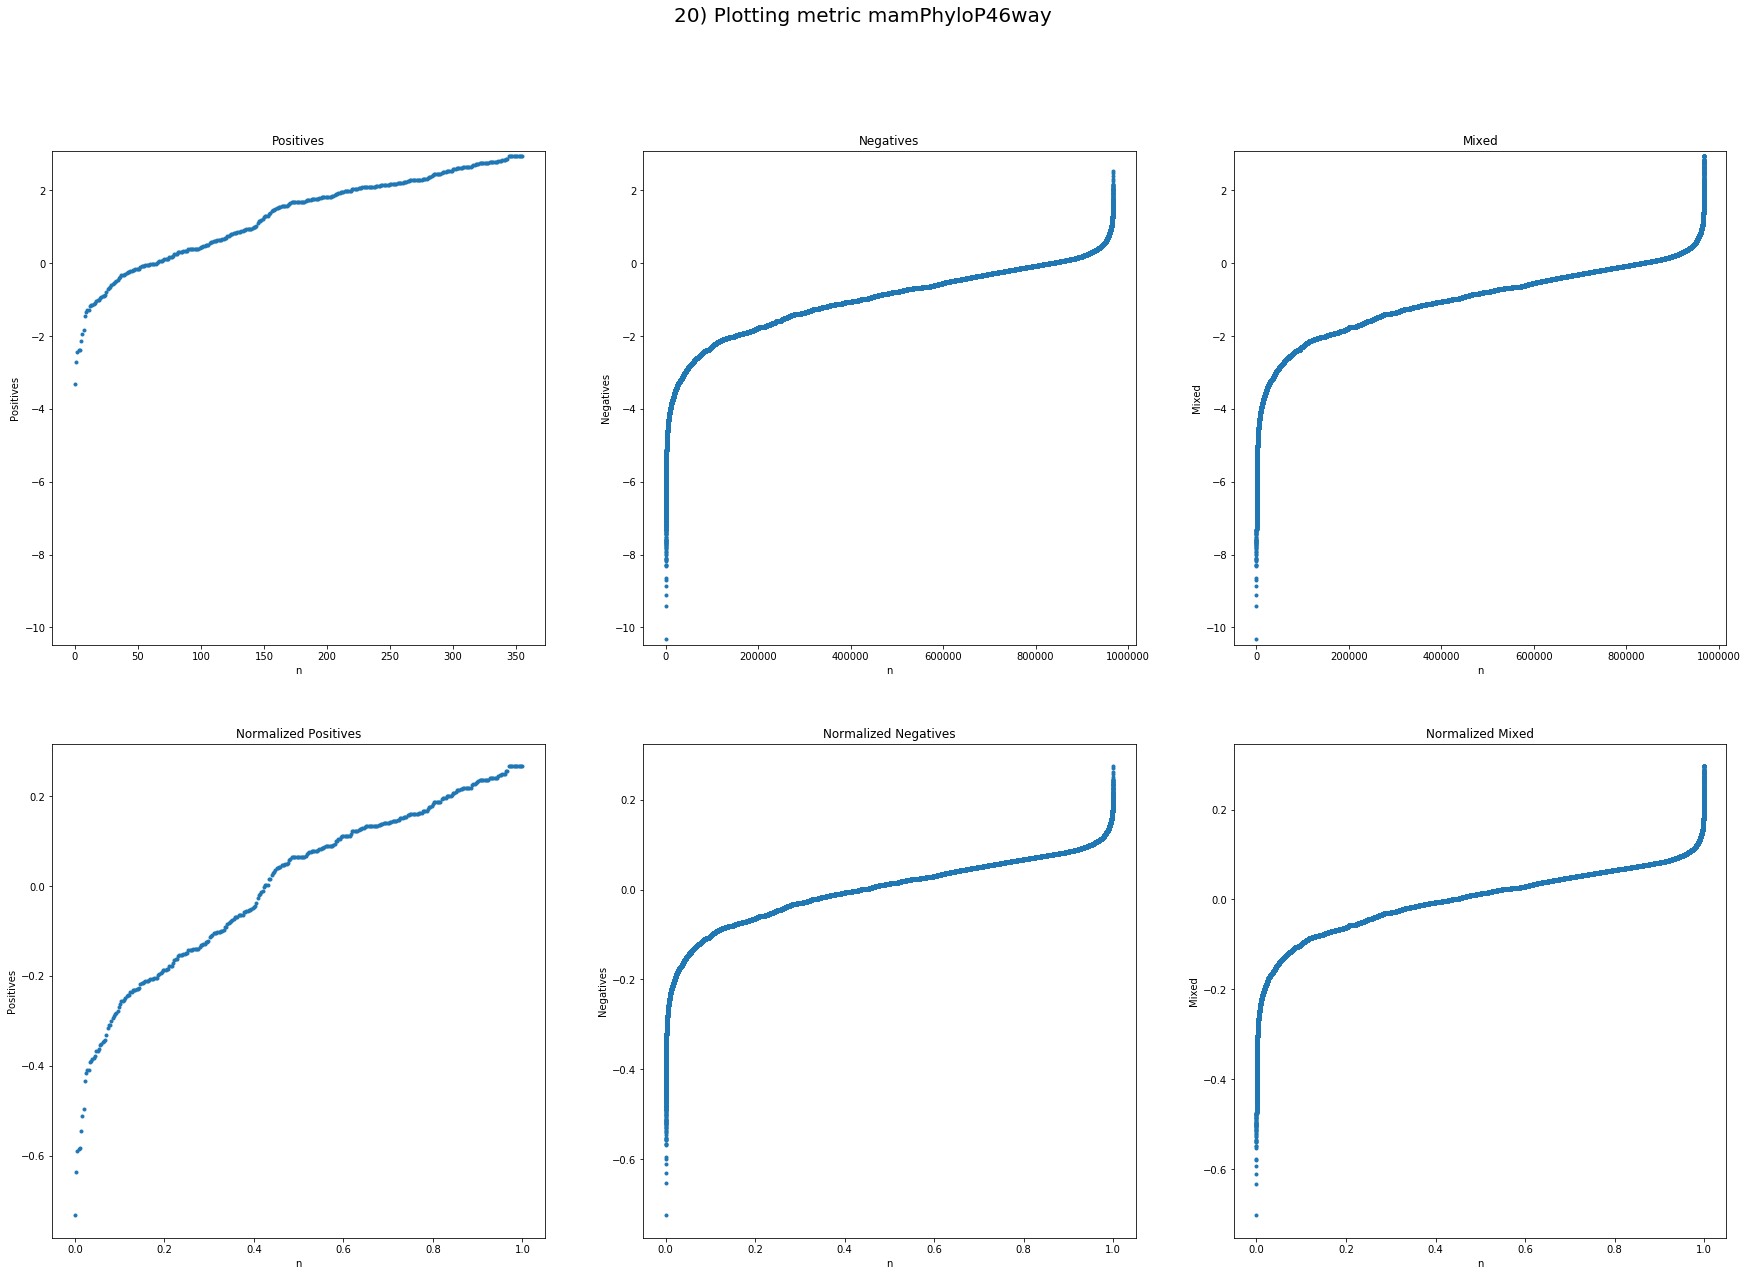

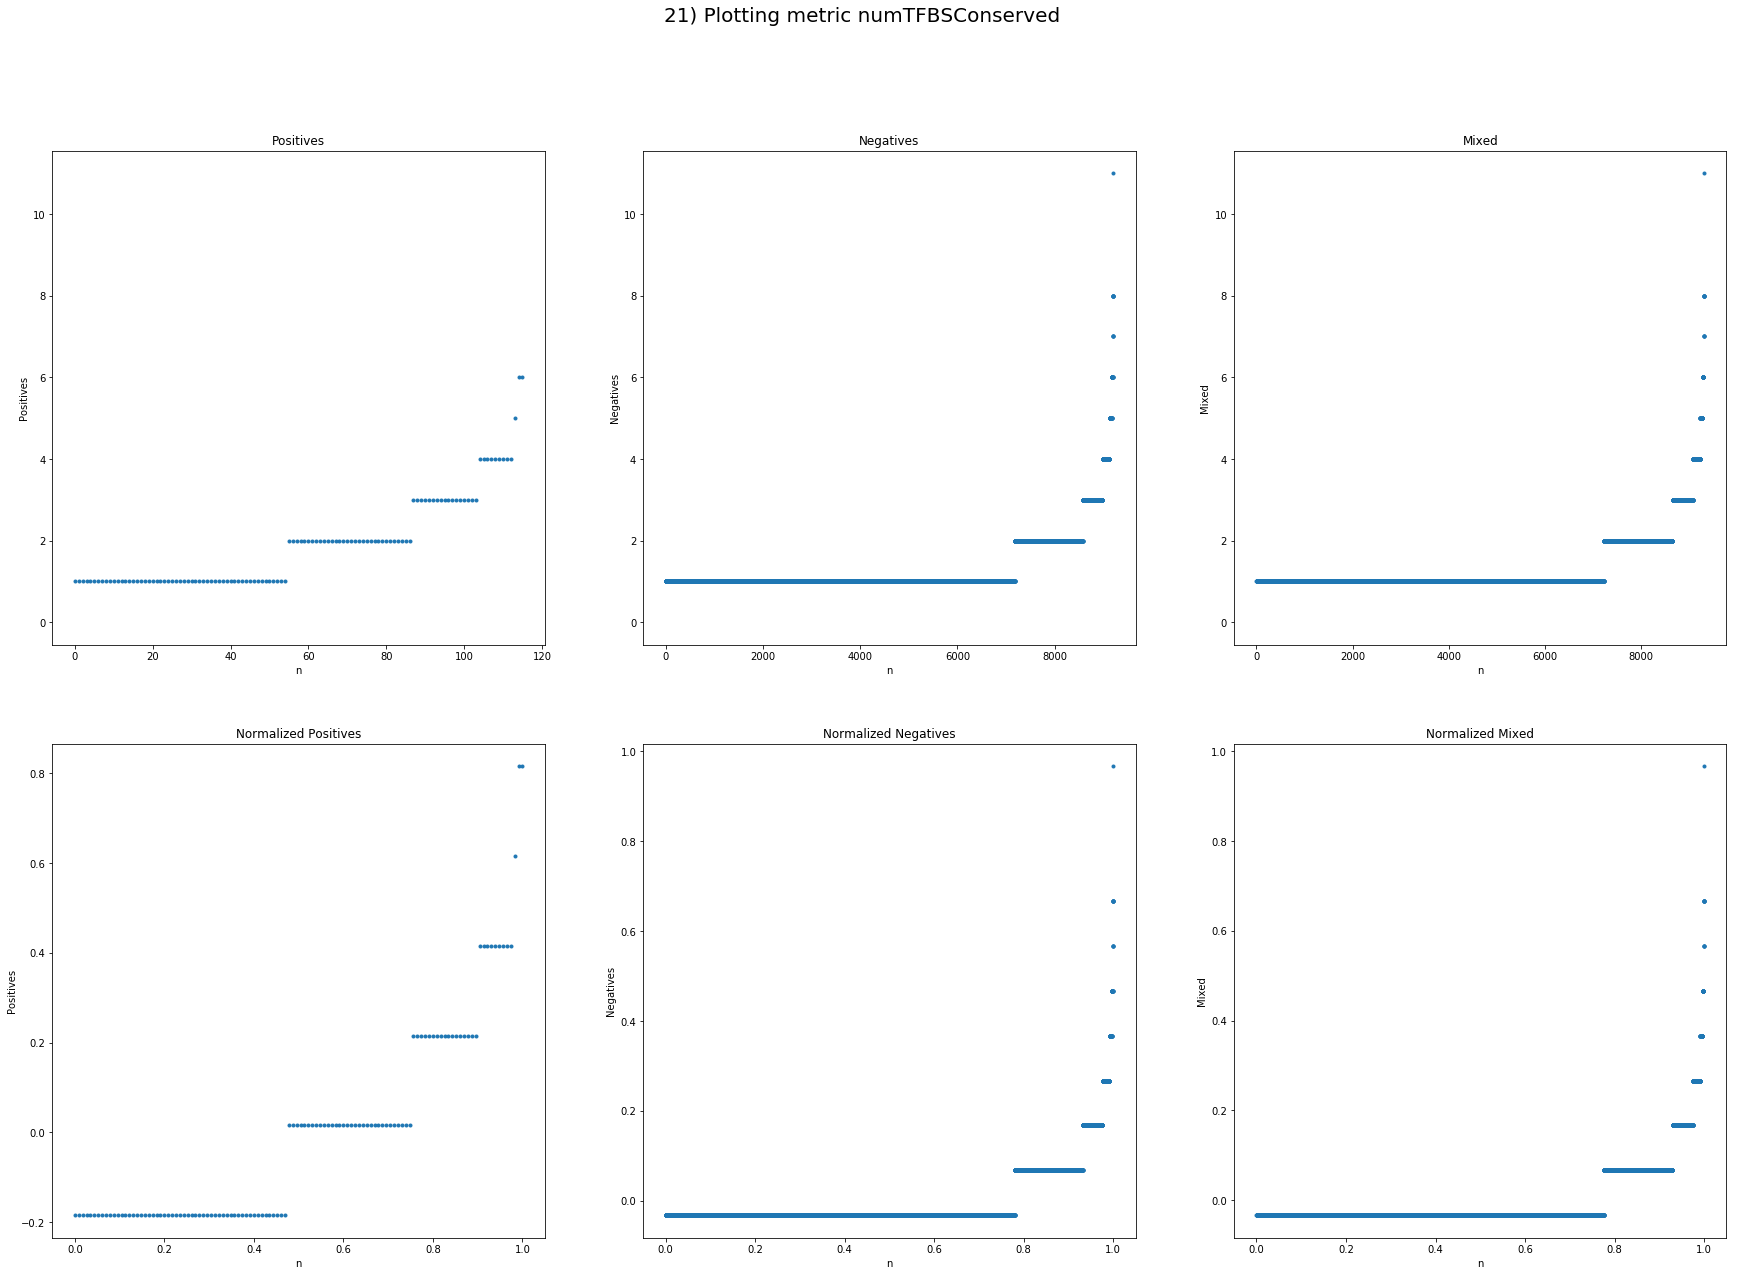

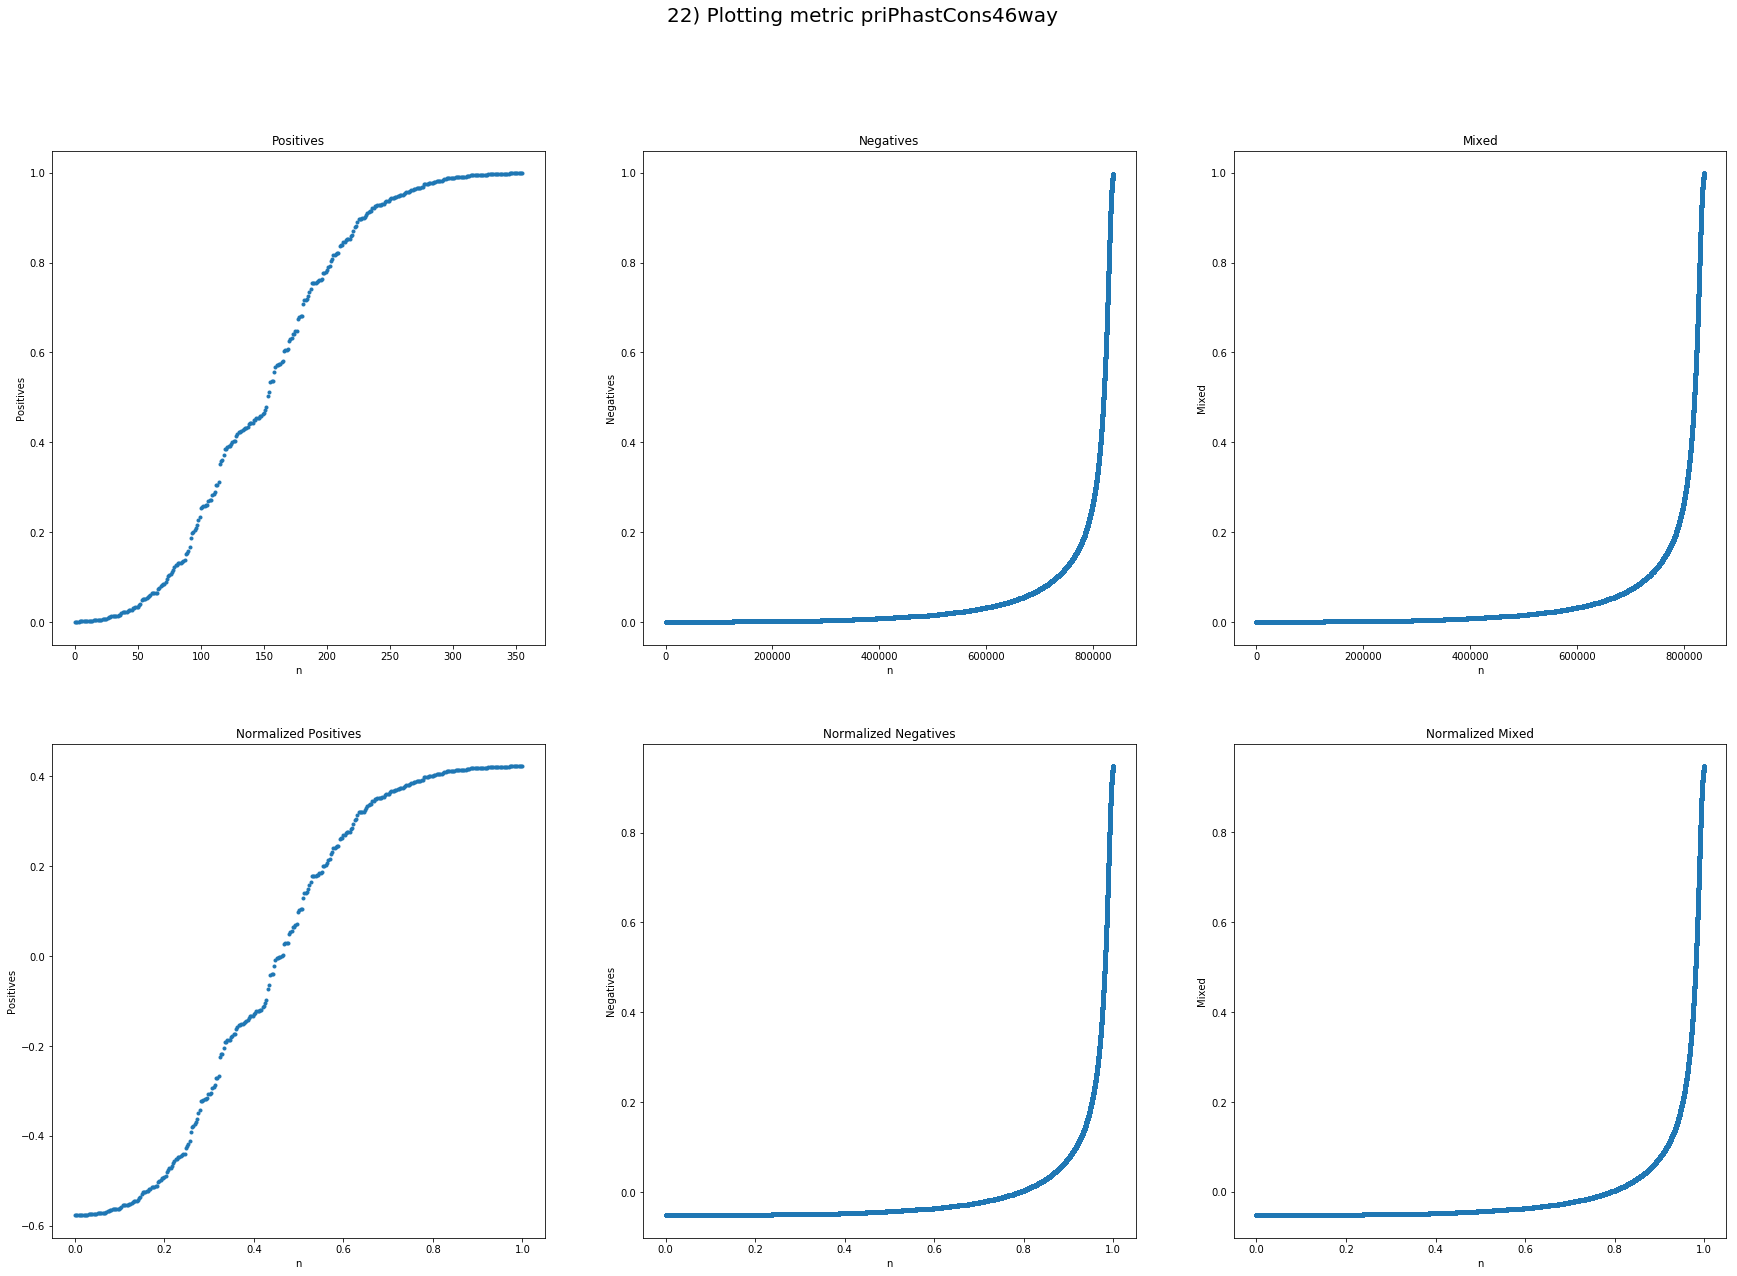

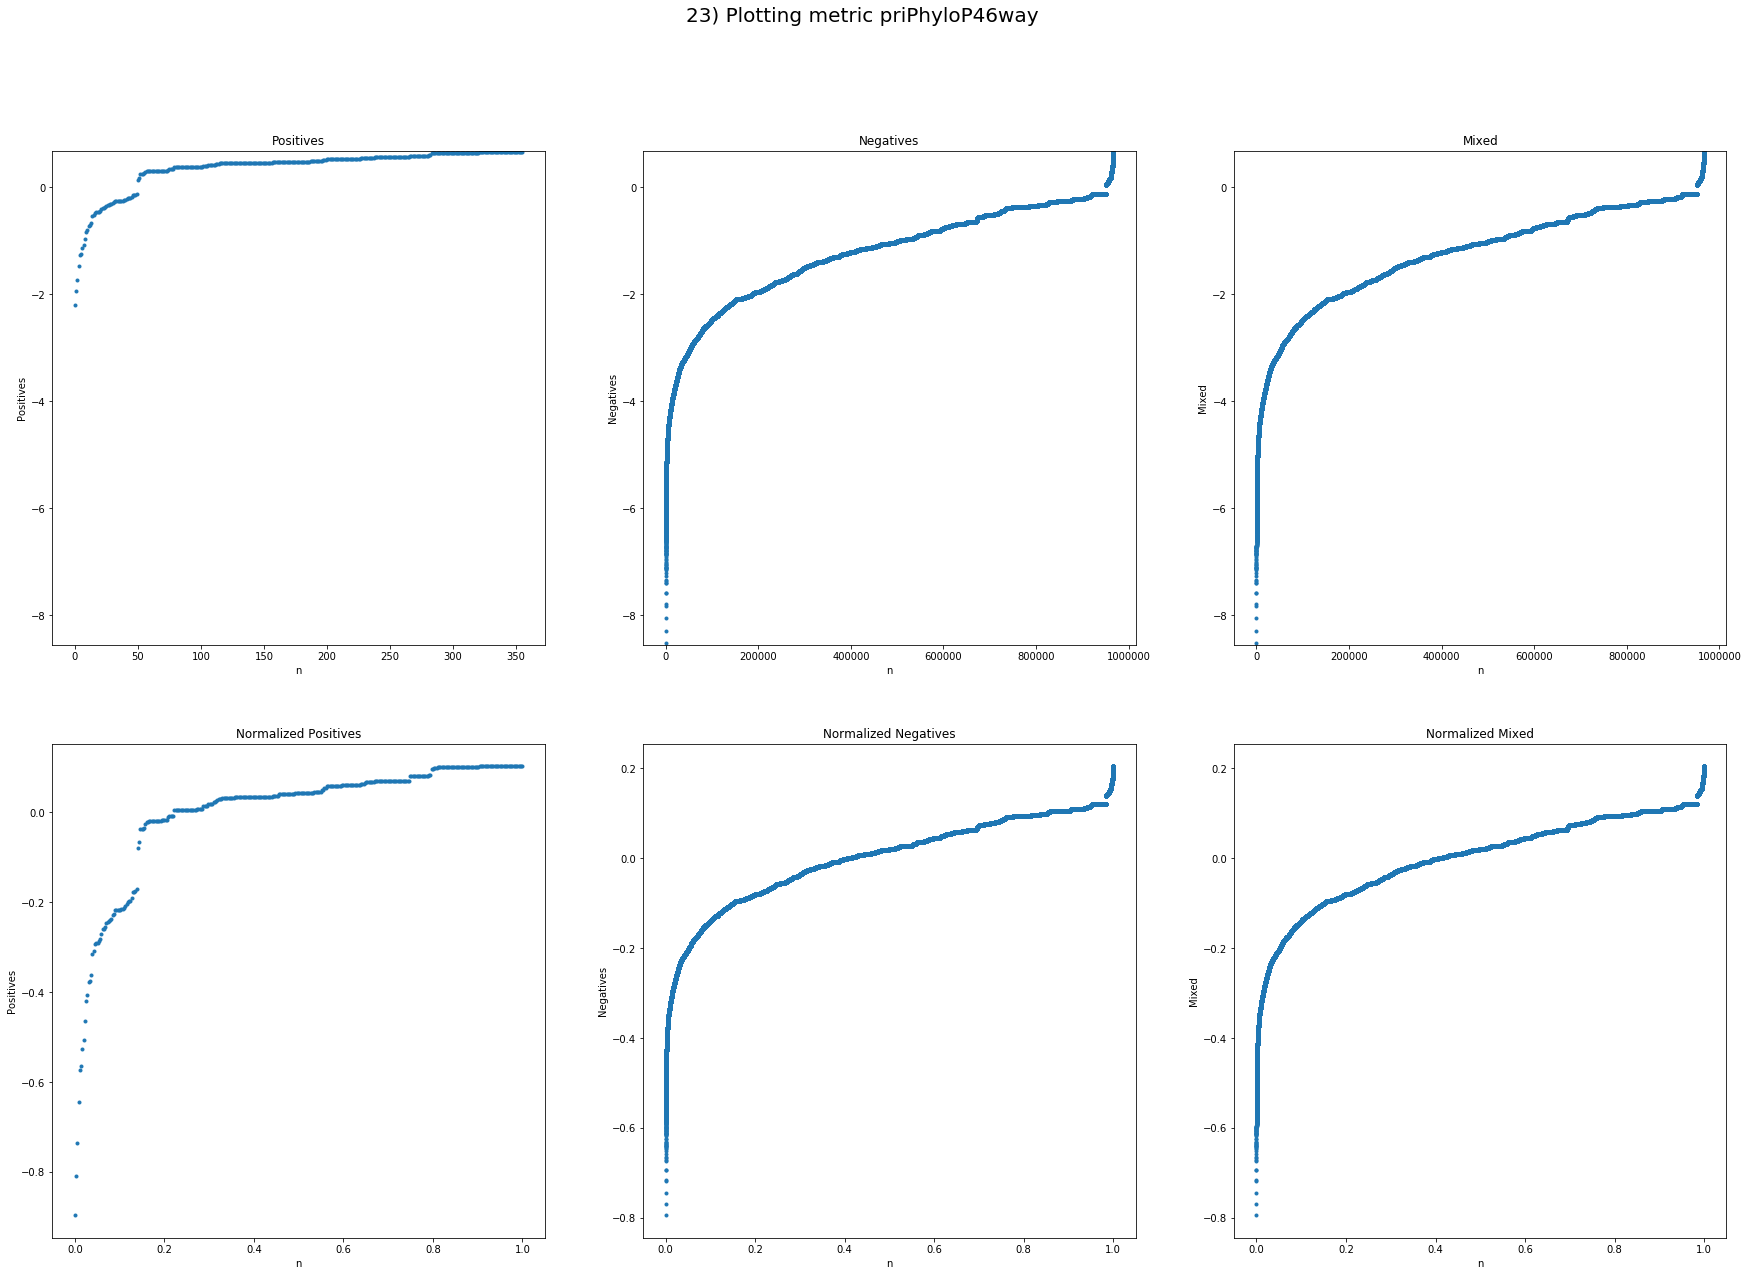

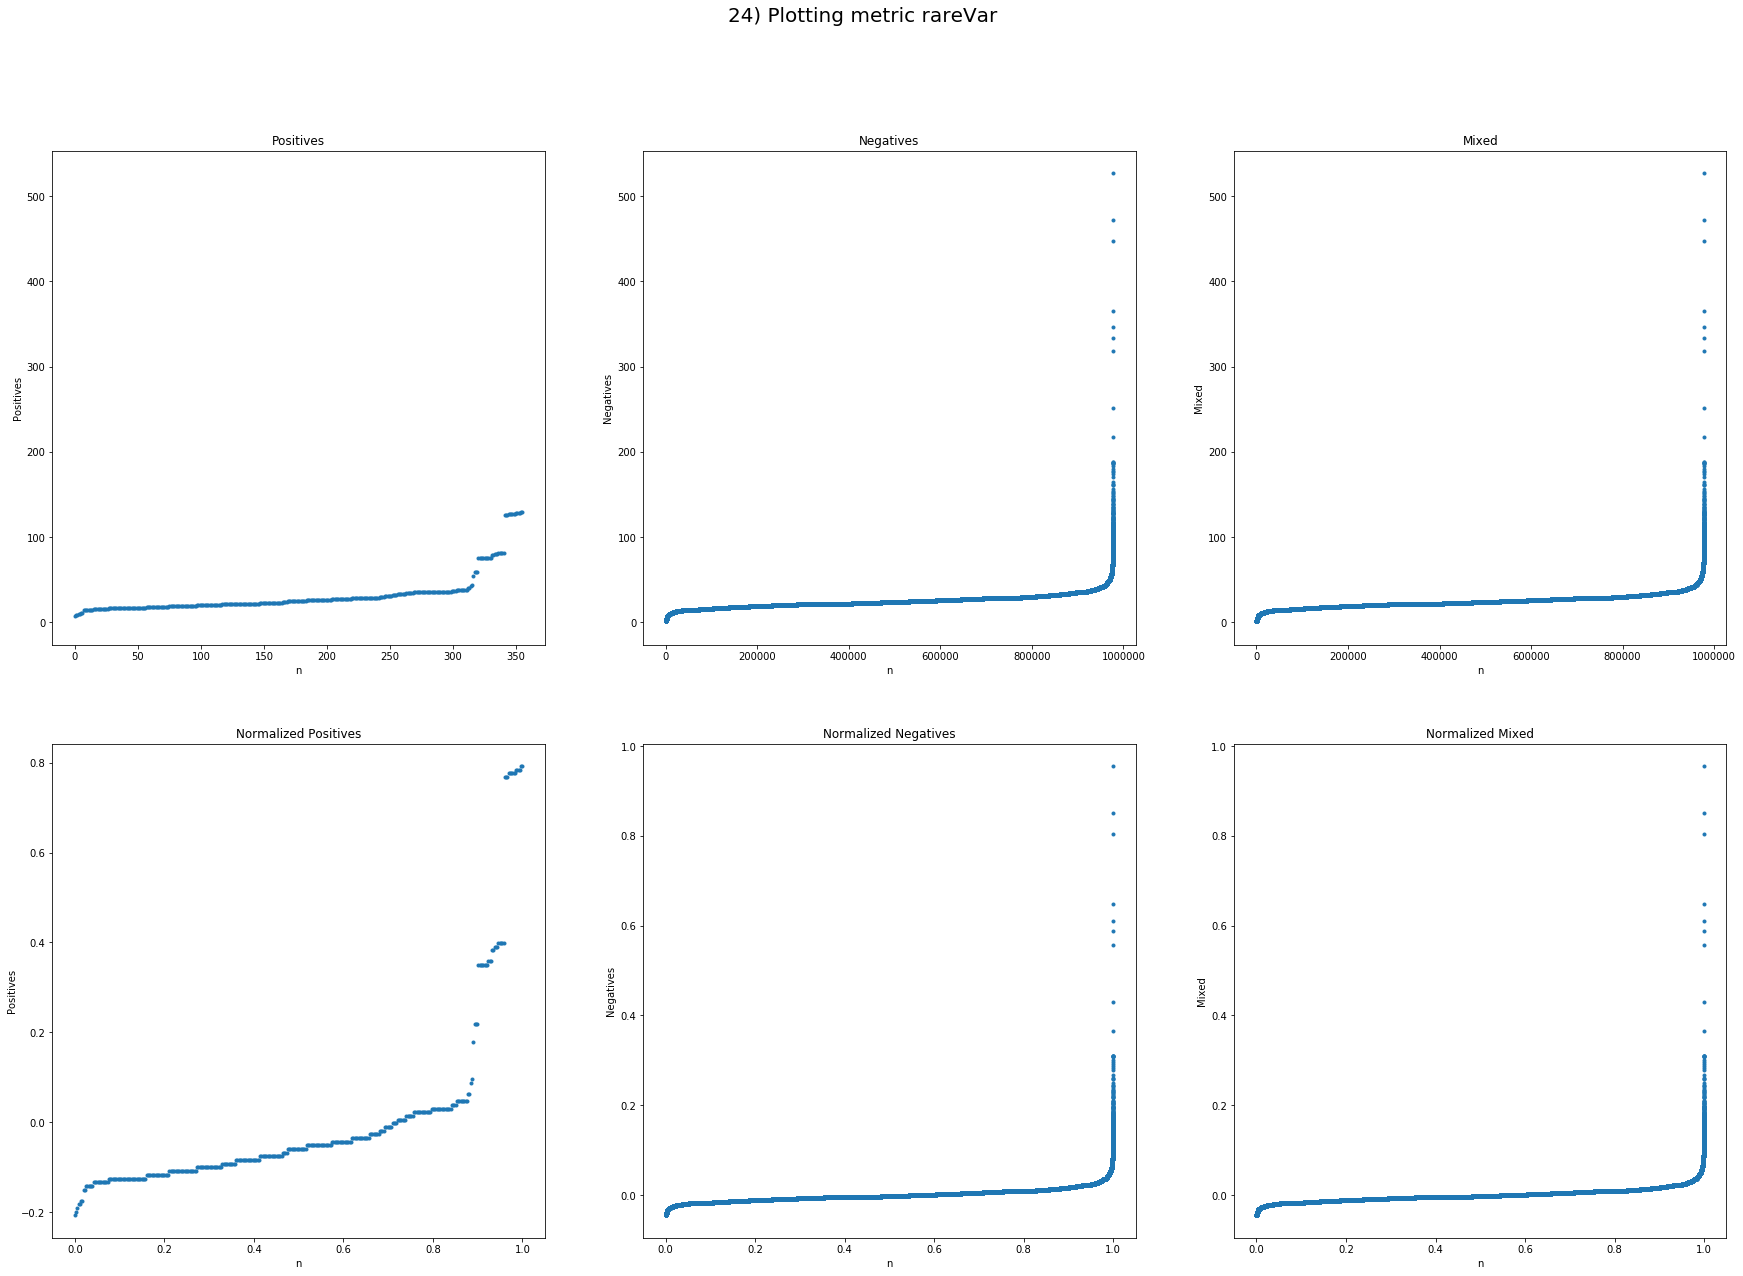

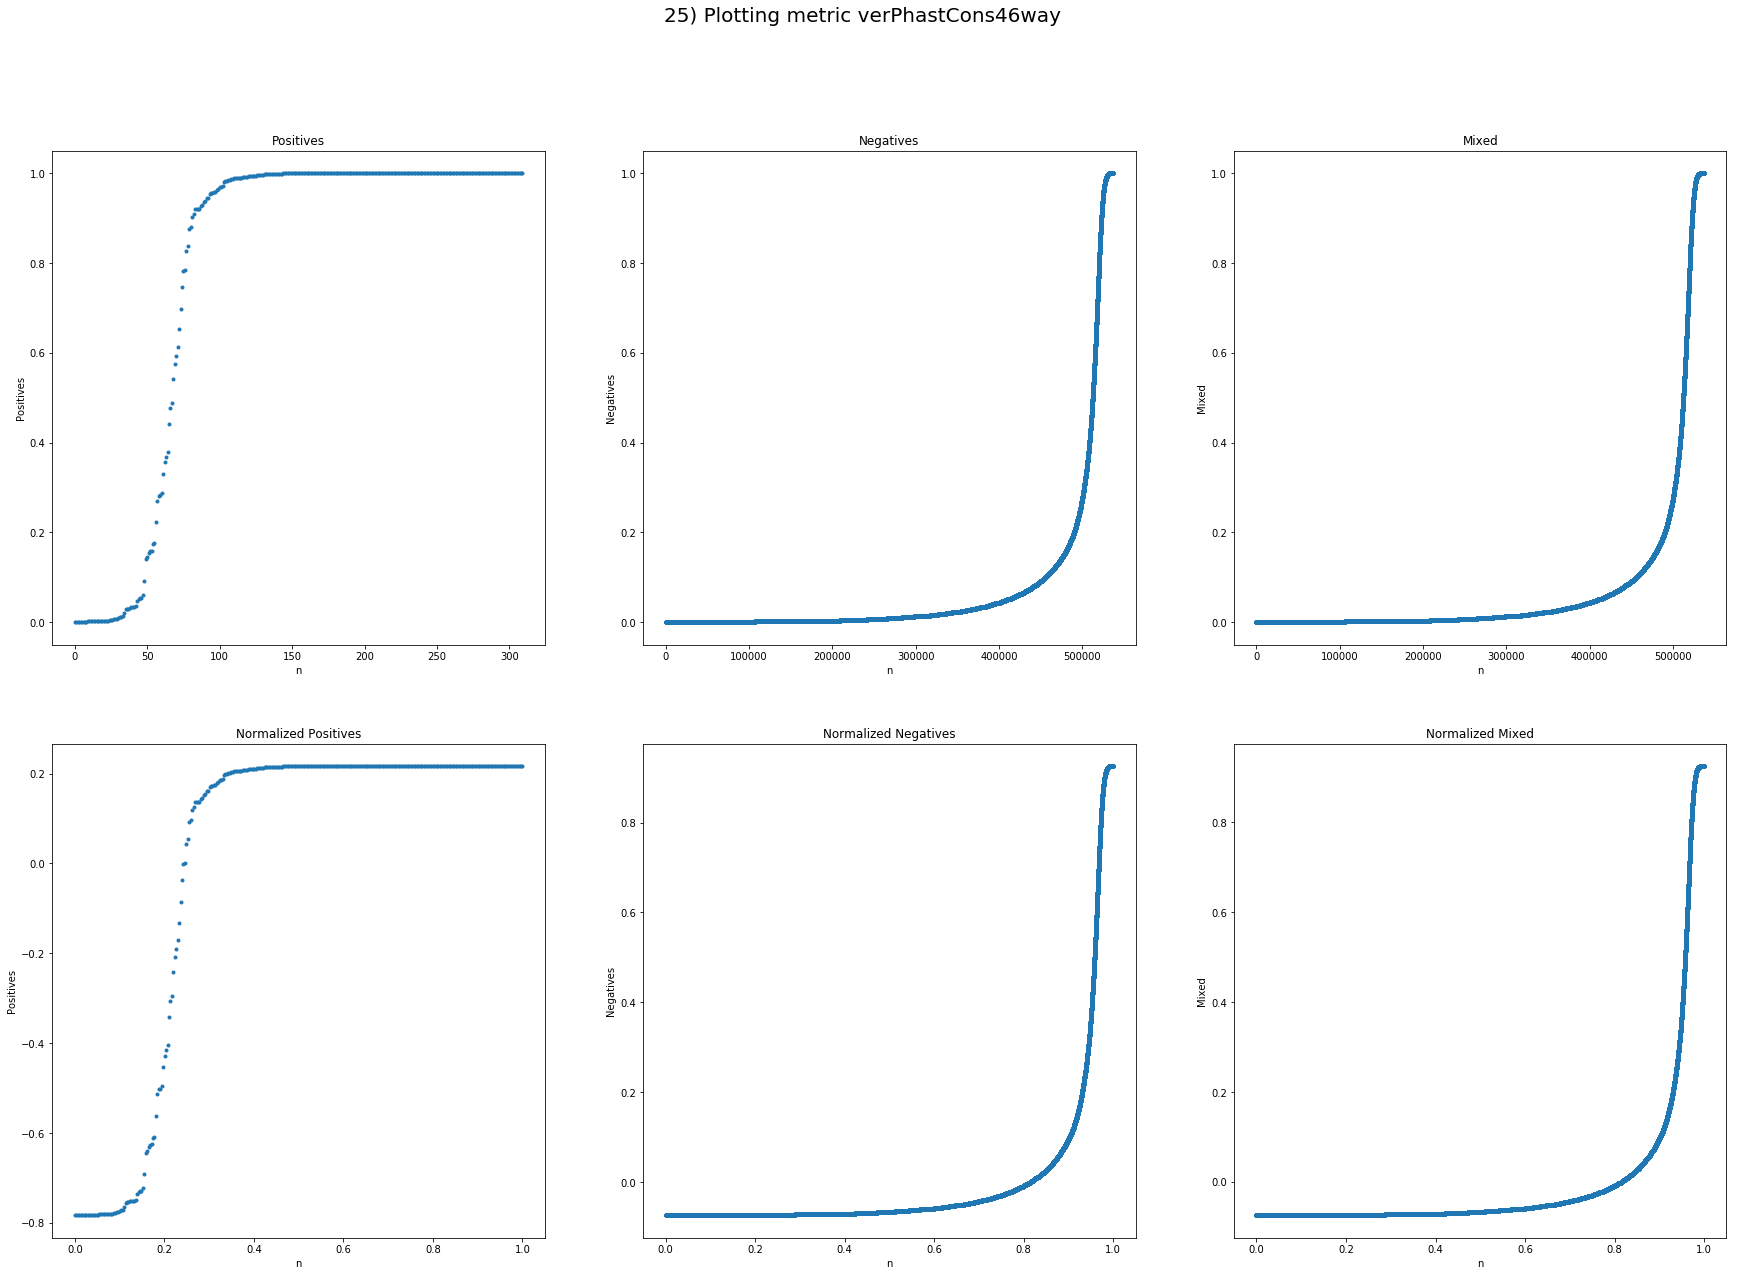

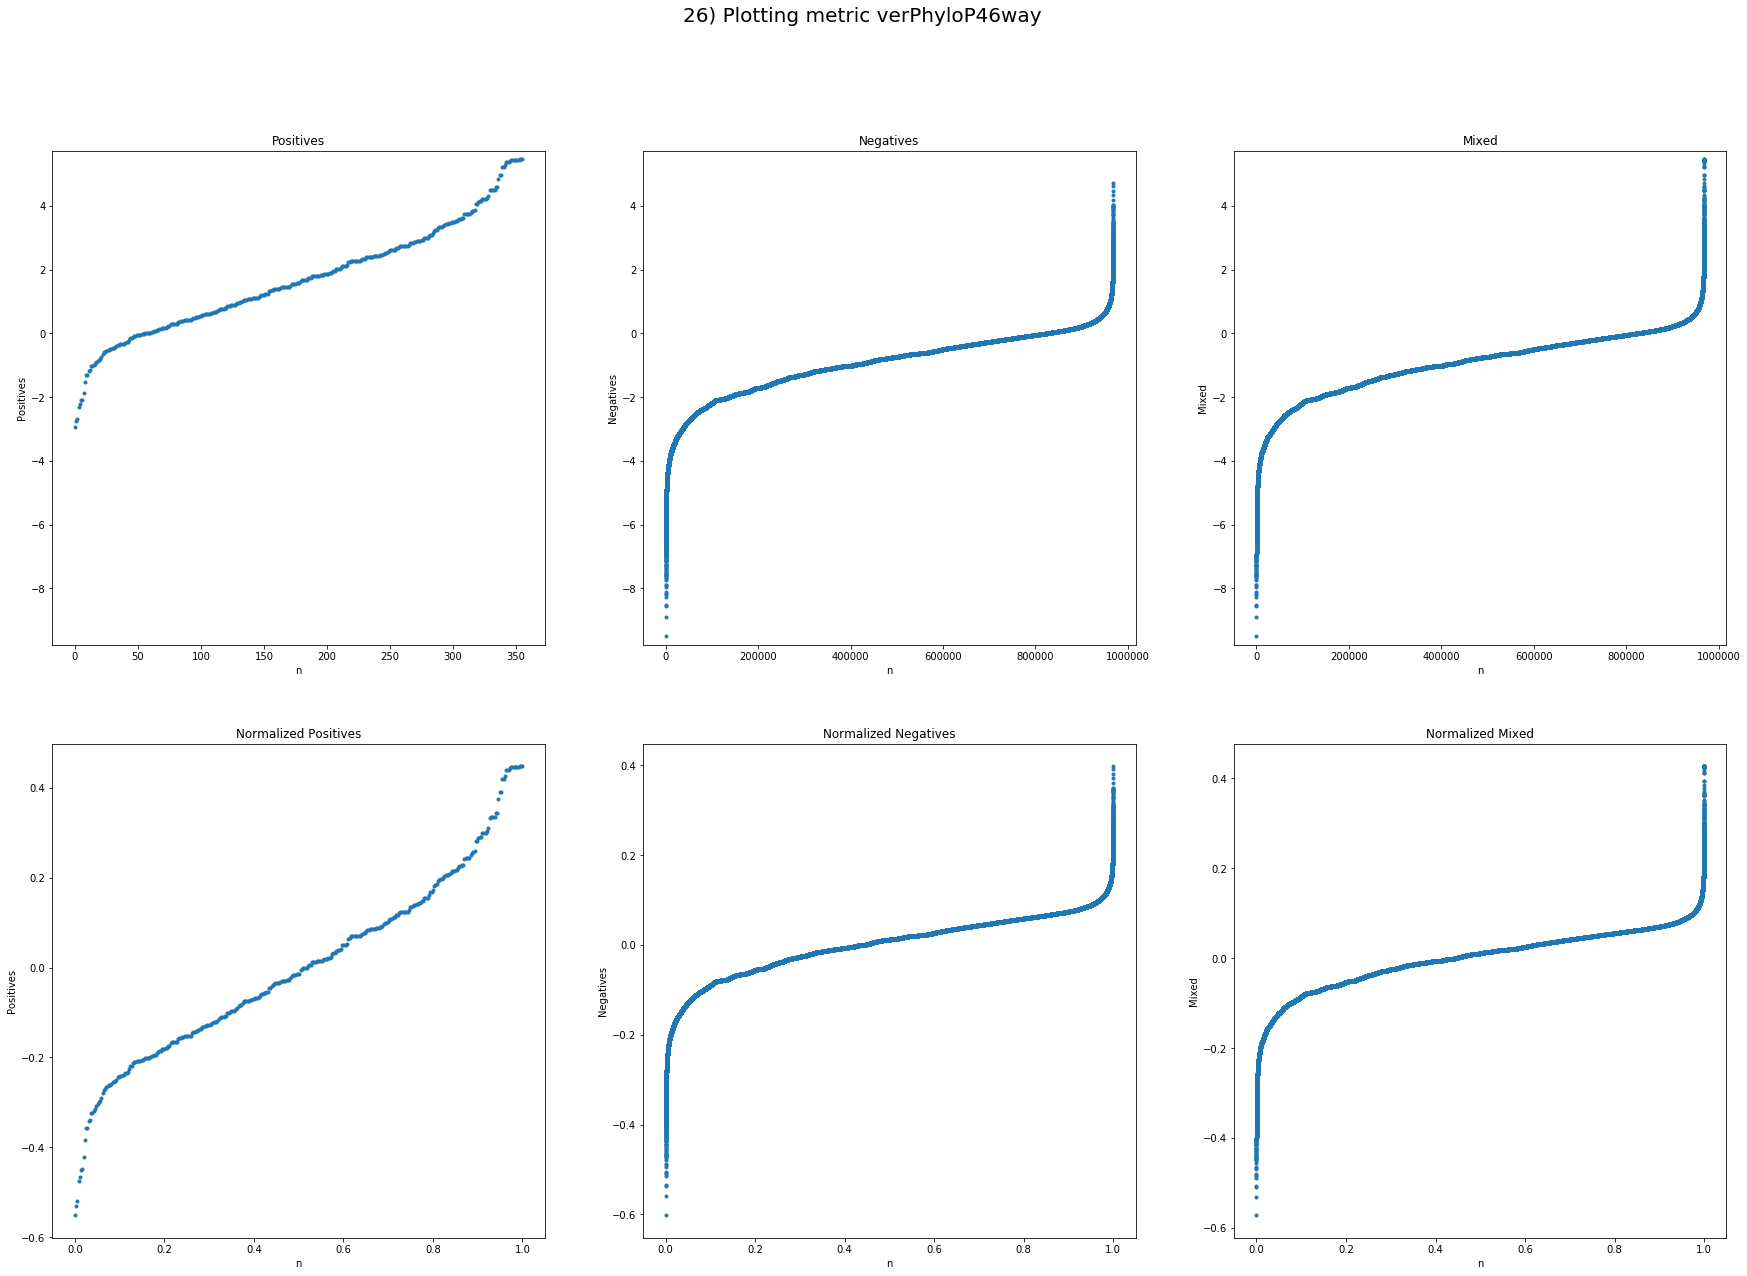

In [11]:
for i, metric in tqdm(enumerate(metrics), total=len(metrics)):
    data = list(df[metric])
    max_val = np.max(data)
    deformation = np.max(data) * 0.05
    max_val += deformation
    min_val = np.min(data) - deformation
    positives, negatives = data[:POSITIVES_NUMBER], data[POSITIVES_NUMBER:]
    plt.rcParams['figure.figsize'] = [30, 20]
    plt.suptitle("%s) Plotting metric %s" % (i + 1, metric), fontsize=20)
    plt.subplot(231)
    plot_metric("Positives", positives, min_val, max_val)
    plt.subplot(234)
    plot_normalized_metric("Positives", positives)
    plt.subplot(232)
    plot_metric("Negatives", negatives, min_val, max_val)
    plt.subplot(235)
    plot_normalized_metric("Negatives", negatives)
    plt.subplot(233)
    plot_metric("Mixed", data, min_val, max_val)
    plt.subplot(236)
    plot_normalized_metric("Mixed", data)
    plt.savefig("plot/%s" % metric)
    plt.show()